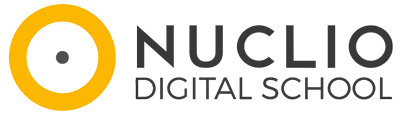

# **Entregable módulo 4: Análisis de datos - Proyecto final**

**Importante:** Guarda este fichero con la nomenclatura *Nombre_apellido_DataAnalysis.ipynb*

## **Caso práctico**
***Análisis de mercado para la apertura de centros especializados de Halterofilia***

***Lift & Lead***, es una startup interesada en abrir centros de entrenamiento especializados en halterofilia ya que con el auge del CrossFit, que integra técnicas de halterofilia, los fundadores creen que este puede ser un buen momento para invertir en centros dedicados exclusivamente a este deporte.

La dirección de ***Lift & Lead*** busca validar la hipótesis de que la popularidad del CrossFit está impulsando el interés por la halterofilia en Europa.

Actualmente no cuentan con mucho conocimiento y para empezar a comprender mejor el sector de la halterofilia y a sus atletas, te han asignado la tarea de analizar los resultados de los campeonatos europeos de halterofilia.

El análisis se hará en dos fases:

1. **Fase 1**: Te han proporcionado acceso a la base de datos de 2019 y 2020
  - La información fue obtenida a través de los siguientes enlaces por el anterior Data Analyst que ha dejado la compañía:
    - https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2019
    - https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2020

2. **Fase 2:** Quieren enriquecer el análisis consideranto un periodo más amplio, incluyendo desde 2019 a 2024 pero no disponen de la información. Para obtenerla harás uso de web scraping de los siguientes enlaces:
    - https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2021
    - https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2022
    - https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2023
    - https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2024

      **Importante:** Se deberá incluir al menos un año adicional de información

## **Preguntas obligatorias a responder (para cada una de las fases)**
- **Pregunta 1.** ¿Cuántas medallas de cada tipo (oro, plata y bronce) ha ganado cada país en la competición? (Sin considerar el género)
- **Pregunta 2.** ¿Qué país ha logrado la mayor equidad en términos de éxito entre sus atletas femeninos y masculinos?
- **Pregunta 3.** ¿En qué país es menor la diferencia entre el promedio de puntos totales conseguidos por atletas femeninos y masculinos?

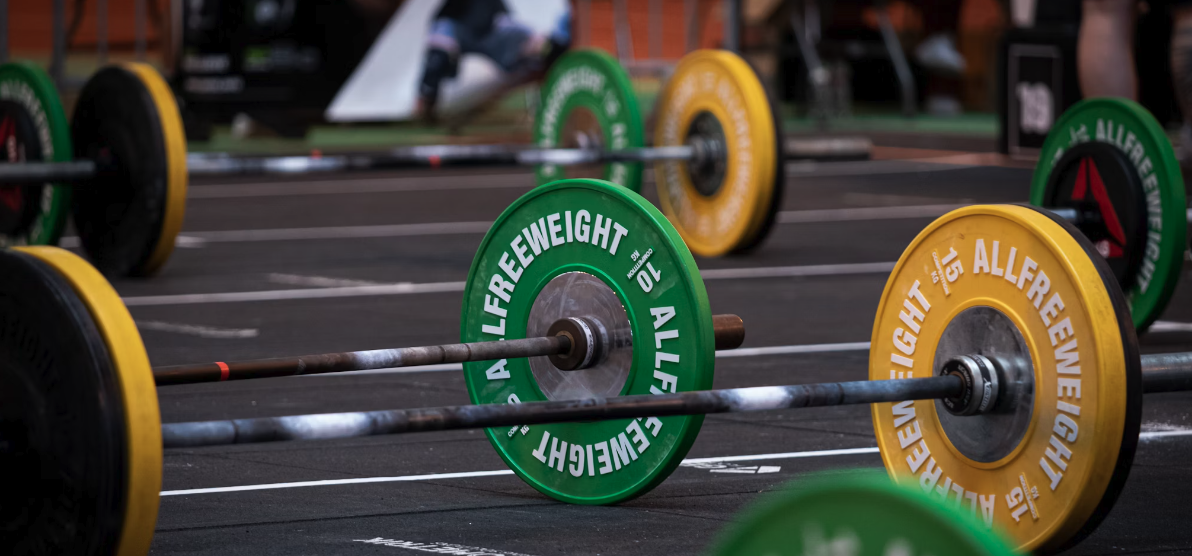

# **Fase 1.** Con la información disponible en el campus virtual

## 0. Importación de librerías

- **Paso 0: Importa las librerías necesarias y define funciones**

In [2]:
pip install tabulate 


Note: you may need to restart the kernel to use updated packages.


🔍  1. Manipulación y análisis de datos

In [3]:
import pandas as pd
import numpy as np

🧼 2. Limpieza de texto y expresiones regulares

In [4]:
import re

📊 3. Visualización de datos

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

## 1. Carga de datos

- **Paso 1: Carga los datos**

In [6]:
df_2019 = pd.read_csv(r'C:\Users\paran\OneDrive\Escritorio\Master Data Analytics\M4 Analisis Exploratorio Datos\Entregable 3 Analisis exploratorio datos\2019_Datos_Campeonato_Europeo_de_Halterofilia.csv')
df_2020 = pd.read_csv(r'C:\Users\paran\OneDrive\Escritorio\Master Data Analytics\M4 Analisis Exploratorio Datos\Entregable 3 Analisis exploratorio datos\2020_Datos_Campeonato_Europeo_de_Halterofilia.csv')


# Vista previa para verificar los datos

print("📊 Datos 2019:")
display(df_2019.head())

print("📊 Datos 2020:")
display(df_2020.head())

📊 Datos 2019:


Eventos                                             Oro  \
0  55 kg (06.04)  Mirco Scarantino Italia  116 + 145 = 261[n 1]​   
1  61 kg (07.04)     Henadz Laptseu Bielorrusia  133 + 153 = 286   
2  67 kg (08.04)        Bernardin Matam Francia  137 + 175 = 312   
3  73 kg (09.04)      Bozhidar Andreev Bulgaria  153 + 192 = 345   
4  81 kg (10.04)      Antonino Pizzolato Italia  155 + 201 = 356   

                                          Plata  \
0  Anguel Rusev Bulgaria  110 + 146 = 256[n 1]​   
1       Bünyamin Sezer Turquía  132 + 151 = 283   
2    Simon Brandhuber Alemania  146 + 165 = 311   
3         Briken Calja Albania  156 + 183 = 339   
4   Piotr Asayonak Bielorrusia  159 + 196 = 355   

                                         Bronce   Año     Genero  
0  Muammer Şahin Turquía  112 + 135 = 247[n 1]​  2019  Masculino  
1         Ferdi Hardal Turquía  127 + 155 = 282  2019  Masculino  
2        Goga Chjeidze Georgia  139 + 169 = 308  2019  Masculino  
3   Vadzim Lijarad Bielorrusia  153 + 182 = 335  2019  Masculino  
4     Ritvars Suharevs Letonia  162 + 192 = 354  2019  Masculino

📊 Datos 2020:


Eventos                                           Oro  \
0  55 kg (04.04)  Anguel Rusev Bulgaria  111 + 147 = 258[n 1]​   
1  61 kg (04.04)     Stilian Grozdev Bulgaria  136 + 160 = 296   
2  67 kg (05.04)       Muhammed Özbek Turquía  145 + 178 = 323   
3  73 kg (06.04)    Daniyar İsmayilov Turquía  160 + 181 = 341   
4  81 kg (07.04)    Antonino Pizzolato Italia  164 + 206 = 370   

                                           Plata  \
0  Valentin Iancu Rumania  108 + 140 = 248[n 1]​   
1     Shota Mishvelidze Georgia  135 + 155 = 290   
2            Mirko Zanni Italia  148 + 170 = 318   
3           Marin Robu Moldavia  156 + 183 = 339   
4         Karlos Nasar Bulgaria  163 + 206 = 369   

                                             Bronce   Año     Genero  
0  Dmytro Voronovsky Ucrania  110 + 137 = 247[n 1]​  2020  Masculino  
1             Ferdi Hardal Turquía  130 + 157 = 287  2020  Masculino  
2       Valentin Guenchev Bulgaria  138 + 177 = 315  2020  Masculino  
3             Briken Calja Albania  152 + 184 = 336  2020  Masculino  
4         Ritvars Suharevs Letonia  157 + 190 = 347  2020  Masculino

## 2. Exploración inicial

- **Paso 2: Realiza una exploración inicial de los datos a analizar**

In [7]:
# Funcion exploracion inicial (check_df)
def check_df(df, tipo=''):
    if tipo == 'simple':
        print("¿Cuántas filas y columnas hay en el conjunto de datos?")
        num_filas, num_columnas = df.shape
        print("\tHay {:,} filas y {:,} columnas.".format(num_filas, num_columnas))

        print("¿Cuáles son las primeras dos filas del conjunto de datos?")
        display(df.head(2))
        print('\n########################################################################################')
    else:
        print("¿Cuántas filas y columnas hay en el conjunto de datos?")
        num_filas, num_columnas = df.shape
        print("\tHay {:,} filas y {:,} columnas.".format(num_filas, num_columnas))
        print('\n########################################################################################')

        print("¿Cuáles son las primeras cinco filas del conjunto de datos?")
        display(df.head())
        print('\n########################################################################################')

        print("¿Cuáles son las últimas cinco filas del conjunto de datos?")
        display(df.tail())
        print('\n########################################################################################')

        print("¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?")
        display(df.sample(n = 5))
        print('\n########################################################################################')

        print("¿Cuáles son las columnas del conjunto de datos? ¿Cuál es el tipo de datos de cada columna?")
        print(df.dtypes)
        print('\n########################################################################################')

        print("¿Cuántas columnas hay de cada tipo de datos?")
        print(df.dtypes.value_counts())
        print('\n########################################################################################')

        print("¿Cuáles son las variables numéricas?")
        df_numericas = df.select_dtypes(include = 'number')
        columnas_numericas = list(df_numericas.columns)
        print(columnas_numericas)
        print('\n########################################################################################')

        print("¿Cuáles son las variables categóricas?")
        df_categoricas = df.select_dtypes(include = 'object')
        columnas_categoricas = list(df_categoricas.columns)
        print(columnas_categoricas)
        print('\n########################################################################################')

        print("¿Cuántos valores únicos tiene cada columna?")
        print(df.nunique())
        print('\n########################################################################################')

        if len(columnas_numericas)>0:
            print("¿Cuáles son las estadísticas descriptivas básicas de las columnas numéricas?")
            display(df.describe(include = 'number'))
            print('\n########################################################################################')

        if len(columnas_categoricas)>0:
            print("¿Cuáles son las estadísticas descriptivas básicas de las columnas categóricas?")
            display(df.describe(include = 'object'))

In [8]:
#check_df(df_2019)
#check_df(df_2020)

#### ¿ Cuántas filas y columnas hay en el conjunto de datos ?

In [9]:
df_2019.shape
df_2020.shape

(20, 6)

Tanto el conjunto de datos de 2019 como el de 2020 contienen:

✅ 20 filas

✅ 6 columnas

Esto indica que cada archivo representa 20 eventos o categorías de competición (probablemente divididas por peso y género), y las columnas registran información como medallas, año y género.

##### ¿ Cuáles son las primeras cinco filas del conjunto de datos ? 

In [10]:
print(df_2019.head(5))  # Para el DataFrame de 2019
print(df_2020.head(5))  # Para el DataFrame de 2020


         Eventos                                             Oro  \
0  55 kg (06.04)  Mirco Scarantino Italia  116 + 145 = 261[n 1]​   
1  61 kg (07.04)     Henadz Laptseu Bielorrusia  133 + 153 = 286   
2  67 kg (08.04)        Bernardin Matam Francia  137 + 175 = 312   
3  73 kg (09.04)      Bozhidar Andreev Bulgaria  153 + 192 = 345   
4  81 kg (10.04)      Antonino Pizzolato Italia  155 + 201 = 356   

                                          Plata  \
0  Anguel Rusev Bulgaria  110 + 146 = 256[n 1]​   
1       Bünyamin Sezer Turquía  132 + 151 = 283   
2    Simon Brandhuber Alemania  146 + 165 = 311   
3         Briken Calja Albania  156 + 183 = 339   
4   Piotr Asayonak Bielorrusia  159 + 196 = 355   

                                         Bronce   Año     Genero  
0  Muammer Şahin Turquía  112 + 135 = 247[n 1]​  2019  Masculino  
1         Ferdi Hardal Turquía  127 + 155 = 282  2019  Masculino  
2        Goga Chjeidze Georgia  139 + 169 = 308  2019  Masculino  
3   Vadzim Lijar

#### ¿ Cuáles son las últimas cinco filas del conjunto de datos ? 

In [11]:
# Últimas 5 filas del dataset 2019
print("📅 Últimas filas de df_2019:")
display(df_2019.tail(5))

# Últimas 5 filas del dataset 2020
print("📅 Últimas filas de df_2020:")
display(df_2020.tail(5))


📅 Últimas filas de df_2019:


Eventos                                         Oro  \
15        71 kg (10.04)  Anastasiya Romanova Rusia  112 + 128 = 240   
16        76 kg (11.04)  Daria Naumava Bielorrusia  106 + 136 = 242   
17  81 kg[n 2]​ (12.04)      Nina Schroth Alemania  102 + 120 = 222   
18        87 kg (12.04)       Xeniya Pasjina Rusia  110 + 132 = 242   
19       +87 kg (13.04)    Tatiana Kashirina Rusia  146 + 185 = 331   

                                           Plata  \
15      Emily Godley Reino Unido  93 + 123 = 216   
16    Lidia Valentín[2]​ España  108 + 133 = 241   
17  Anna Van Bellinghen Bélgica  103 + 118 = 221   
18         Diana Mstiyeva Rusia  110 + 130 = 240   
19   Anastasiya Lysenko Ucrania  120 + 148 = 268   

                                         Bronce   Año    Genero  
15      Mădălina Molie Rumania  101 + 114 = 215  2019  Femenino  
16    Patricia Strenius Suecia  101 + 132 = 233  2019  Femenino  
17    Liana Guiurdzhian Armenia  97 + 120 = 217  2019  Femenino  
18       Sarah Fischer Austria  102 + 129 = 231  2019  Femenino  
19  Emily Campbell Reino Unido  115 + 145 = 260  2019  Femenino

📅 Últimas filas de df_2020:


Eventos                                          Oro  \
15   71 kg (07.04)     Emily Godley Reino Unido  98 + 129 = 227   
16   76 kg (08.04)          Iryna Deja Ucrania  113 + 135 = 248   
17   81 kg (09.04)    Alina Marushchak Ucrania  109 + 127 = 236   
18   87 kg (10.04)        Daria Ajmerova Rusia  108 + 138 = 246   
19  +87 kg (11.04)  Emily Campbell Reino Unido  122 + 154 = 276   

                                             Plata  \
15          Alessia Durante Italia  97 + 122 = 219   
16            Yana Sotiyeva Rusia  112 + 134 = 246   
17  Gaëlle Nayo-Ketchanke Francia  100 + 131 = 231   
18          Elena Cîlcic Moldavia  107 + 138 = 245   
19     Anastasiya Lysenko Ucrania  116 + 136 = 252   

                                        Bronce   Año    Genero  
15        Raluca Olaru Rumania  98 + 120 = 218  2020  Femenino  
16  Anastasiya Romanova Rusia  111 + 132 = 243  2020  Femenino  
17   Liana Guiurdzhian Armenia  98 + 129 = 227  2020  Femenino  
18      Daria Riazanova Rusia  105 + 135 = 240  2020  Femenino  
19       Melike Günal Turquía  108 + 135 = 243  2020  Femenino

In [12]:
def mostrar_tabla(df, nombre="Tabla", formato='fancy_grid', filas=5):
    print(f"\n📊 {nombre}")
    print(tabulate(df.head(filas), headers='keys', tablefmt=formato))


In [13]:
mostrar_tabla(df_2019, "df_2019", formato='github')
mostrar_tabla(df_2020, "df_2020", formato='pipe')



📊 df_2019
|    | Eventos       | Oro                                           | Plata                                       | Bronce                                      |   Año | Genero    |
|----|---------------|-----------------------------------------------|---------------------------------------------|---------------------------------------------|-------|-----------|
|  0 | 55 kg (06.04) | Mirco Scarantino Italia  116 + 145 = 261[n 1]​ | Anguel Rusev Bulgaria  110 + 146 = 256[n 1]​ | Muammer Şahin Turquía  112 + 135 = 247[n 1]​ |  2019 | Masculino |
|  1 | 61 kg (07.04) | Henadz Laptseu Bielorrusia  133 + 153 = 286   | Bünyamin Sezer Turquía  132 + 151 = 283     | Ferdi Hardal Turquía  127 + 155 = 282       |  2019 | Masculino |
|  2 | 67 kg (08.04) | Bernardin Matam Francia  137 + 175 = 312      | Simon Brandhuber Alemania  146 + 165 = 311  | Goga Chjeidze Georgia  139 + 169 = 308      |  2019 | Masculino |
|  3 | 73 kg (09.04) | Bozhidar Andreev Bulgaria  153 + 192 = 345    | 

##### ¿ Cuáles son las columnas  del conjunto de datos ? 

In [14]:
# Mostrar las columnas del DataFrame de 2019
print("📋 Columnas de df_2019:")
print(df_2019.columns.tolist())

# Mostrar las columnas del DataFrame de 2020
print("\n📋 Columnas de df_2020:")
print(df_2020.columns.tolist())


📋 Columnas de df_2019:
['Eventos', 'Oro', 'Plata', 'Bronce', 'Año', 'Genero']

📋 Columnas de df_2020:
['Eventos', 'Oro', 'Plata', 'Bronce', 'Año', 'Genero']


#### ¿ Cuál es el tipo de datos de cada columna ?

In [15]:
# Tipos de datos para df_2019
print("📊 Tipos de datos en df_2019:")
print(df_2019.dtypes)

# Tipos de datos para df_2020
print("\n📊 Tipos de datos en df_2020:")
print(df_2020.dtypes)


📊 Tipos de datos en df_2019:
Eventos    object
Oro        object
Plata      object
Bronce     object
Año         int64
Genero     object
dtype: object

📊 Tipos de datos en df_2020:
Eventos    object
Oro        object
Plata      object
Bronce     object
Año         int64
Genero     object
dtype: object


#### ¿ Cuáles son las variables numéricas ?

In [16]:
# Variables numéricas en df_2019
print("📐 Variables numéricas en df_2019:")
print(df_2019.select_dtypes(include=['int64', 'float64']).columns.tolist())


# Variables numéricas en df_2020
print("\n📐 Variables numéricas en df_2020:")
print(df_2020.select_dtypes(include=['int64', 'float64']).columns.tolist())


📐 Variables numéricas en df_2019:
['Año']

📐 Variables numéricas en df_2020:
['Año']


#### ¿ Cuáles son las variables categóricas ? 

In [17]:
# Variables categóricas en df_2019
print("\n🧩 Variables categóricas en df_2019:")
print(df_2019.select_dtypes(include=['object']).columns.tolist())


# Variables categóricas en df_2020
print("\n🧩 Variables categóricas en df_2020:")
print(df_2020.select_dtypes(include=['object']).columns.tolist())



🧩 Variables categóricas en df_2019:
['Eventos', 'Oro', 'Plata', 'Bronce', 'Genero']

🧩 Variables categóricas en df_2020:
['Eventos', 'Oro', 'Plata', 'Bronce', 'Genero']


#### ¿ Cómo podríamos obtener información más completa sobre las estructura y el contenido del DataFrame ?

🧾 1. .info() – Resumen estructural

Muestra número de entradas, columnas, tipos de datos y valores no nulos:

In [18]:
print(df_2019.info())
print(df_2020.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Eventos  20 non-null     object
 1   Oro      20 non-null     object
 2   Plata    20 non-null     object
 3   Bronce   20 non-null     object
 4   Año      20 non-null     int64 
 5   Genero   20 non-null     object
dtypes: int64(1), object(5)
memory usage: 1.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Eventos  20 non-null     object
 1   Oro      20 non-null     object
 2   Plata    20 non-null     object
 3   Bronce   20 non-null     object
 4   Año      20 non-null     int64 
 5   Genero   20 non-null     object
dtypes: int64(1), object(5)
memory usage: 1.1+ KB
None


📊 2. .describe() – Estadísticas básicas

Solo aplica a columnas numéricas por defecto. Para ver las categóricas, usa

In [19]:
print(df_2019.describe())                  # Estadísticas numéricas
print(df_2019.describe(include='object'))  # Estadísticas de texto


          Año
count    20.0
mean   2019.0
std       0.0
min    2019.0
25%    2019.0
50%    2019.0
75%    2019.0
max    2019.0
              Eventos                                             Oro  \
count              20                                              20   
unique             20                                              20   
top     55 kg (06.04)  Mirco Scarantino Italia  116 + 145 = 261[n 1]​   
freq                1                                               1   

                                               Plata  \
count                                             20   
unique                                            20   
top     Anguel Rusev Bulgaria  110 + 146 = 256[n 1]​   
freq                                               1   

                                              Bronce     Genero  
count                                             20         20  
unique                                            20          2  
top     Muammer Şahin Turquía

🔍 3. .value_counts() – Frecuencia de valores únicos
Para columnas catagóricas como 'Genero'

In [20]:
print(df_2019['Genero'].value_counts())
print(df_2020['Genero'].value_counts())


Genero
Masculino    10
Femenino     10
Name: count, dtype: int64
Genero
Masculino    10
Femenino     10
Name: count, dtype: int64


📦 4. .nunique() – Nº de valores únicos por columna

Te dice cuántos valores distintos hay por columna:

In [21]:
print(df_2019.nunique())
print(df_2020.nunique())



Eventos    20
Oro        20
Plata      20
Bronce     20
Año         1
Genero      2
dtype: int64
Eventos    19
Oro        20
Plata      20
Bronce     20
Año         1
Genero      2
dtype: int64


🔧 5. .isnull().sum() – Recuento de valores nulos

In [22]:
print(df_2019.isnull().sum())
print(df_2020.isnull().sum())

Eventos    0
Oro        0
Plata      0
Bronce     0
Año        0
Genero     0
dtype: int64
Eventos    0
Oro        0
Plata      0
Bronce     0
Año        0
Genero     0
dtype: int64


## 3. Limpieza de datos

- **Paso 3: Asegúrate de que los datos no contengan valores problemáticos**

In [23]:
# Verificar valores nulos en df_2019
print("🔍 Valores nulos en df_2019:")
print(df_2019.isnull().sum())

# Verificar valores nulos en df_2020
print("\n🔍 Valores nulos en df_2020:")
print(df_2020.isnull().sum())

# Verificar filas duplicadas en df_2019
print("\n📎 Filas duplicadas en df_2019:")
print(df_2019.duplicated().sum())

# Verificar filas duplicadas en df_2020
print("\n📎 Filas duplicadas en df_2020:")
print(df_2020.duplicated().sum())


🔍 Valores nulos en df_2019:
Eventos    0
Oro        0
Plata      0
Bronce     0
Año        0
Genero     0
dtype: int64

🔍 Valores nulos en df_2020:
Eventos    0
Oro        0
Plata      0
Bronce     0
Año        0
Genero     0
dtype: int64

📎 Filas duplicadas en df_2019:
0

📎 Filas duplicadas en df_2020:
0


In [24]:
if list(df_2019.columns) == list(df_2020.columns):
    df_combinado =pd.concat([df_2019, df_2020], ignore_index=True)
    print('Archivos combinados con exito')
else: 
    print ('Los dataframes no tienen las mismas columnas o no están en el mismo orden')
    print ('Columnas en df_2019:', list(df_2019.columns))
    print ('Columnas en df_2020:', list(df_2020.columns))

Archivos combinados con exito


In [25]:
# Funcion para identificar valores problematicos
def id_valores_problem(df, columnas=[]):
    print('###################################################################################')
    print('3.1.1. Proporción de NULOS en cada una de las columnas del conjunto de datos:')
    print(round((df.isnull().sum()/len(df))*100, 2).sort_values(ascending= False))
    print('###################################################################################')
    print(f'3.1.2. Número de DUPLICADOS totales: {df.duplicated().sum()}')
    print('###################################################################################')
    if len(columnas) > 0:
        print(f'3.1.2. Número de DUPLICADOS parciales según las columnas {columnas}: {df.duplicated(subset=columnas).sum()}')
        print('###################################################################################')
    df_numericas = df.select_dtypes(include = 'number')
    columnas_numericas = list(df_numericas.columns)
    if len(columnas_numericas) > 0:
        print('3.1.3. Columnas numéricas con OUTLIERS')
        for var in columnas_numericas:
            Q1 = df[var].quantile(0.25)
            Q3 = df[var].quantile(0.75)
            limite_inferior = Q1 - 1.5 * (Q3 - Q1)
            limite_superior = Q3 + 1.5 * (Q3 - Q1)
            outliers = df[(df[var] < limite_inferior) | (df[var] > limite_superior)]
            print(f'Número de outliers en la columna "{var}": {outliers.shape[0]}')
        print('###################################################################################')

In [26]:
id_valores_problem(df_combinado)

###################################################################################
3.1.1. Proporción de NULOS en cada una de las columnas del conjunto de datos:
Eventos    0.0
Oro        0.0
Plata      0.0
Bronce     0.0
Año        0.0
Genero     0.0
dtype: float64
###################################################################################
3.1.2. Número de DUPLICADOS totales: 0
###################################################################################
3.1.3. Columnas numéricas con OUTLIERS
Número de outliers en la columna "Año": 0
###################################################################################


Los datos están completamente limpios en cuanto a estructura. Aquí el resumen:

| Validación       | df\_2019  | df\_2020 |
| ---------------- | --------- | -------- |
| Valores nulos    | ❌ Ninguno | ❌ Ninguno  |
| Filas duplicadas | ❌ Ninguno | ❌ Ninguno  |


### Sin embargo, durante la visualización he visto que hay varias columnas con valores problemáticos como [n 1 ] y [n 2]

## 4. Transformación de datos

- **Paso 4: Crea un único dataframe con los datos de 2019 y 2020**

In [27]:
df_combinado = df_combinado.melt(
    id_vars = ["Eventos", "Año", "Genero"],   # Mantemos columnas iniciales
    value_vars=["Oro", "Plata", "Bronce"],    # Pasamos los valores de la columna medallas a filas
    var_name="Medalla",                       # Creamos la columna Medalla
    value_name="Atleta"                       # Creamos la columna Atleta
)

In [28]:
df_combinado['Atleta'] = df_combinado ['Atleta'].str.replace('[n 1]', '')   #Eliminamos los valores [n 1] de la columna atleta
df_combinado

Eventos   Año     Genero Medalla  \
0     55 kg (06.04)  2019  Masculino     Oro   
1     61 kg (07.04)  2019  Masculino     Oro   
2     67 kg (08.04)  2019  Masculino     Oro   
3     73 kg (09.04)  2019  Masculino     Oro   
4     81 kg (10.04)  2019  Masculino     Oro   
..              ...   ...        ...     ...   
115   71 kg (07.04)  2020   Femenino  Bronce   
116   76 kg (08.04)  2020   Femenino  Bronce   
117   81 kg (09.04)  2020   Femenino  Bronce   
118   87 kg (10.04)  2020   Femenino  Bronce   
119  +87 kg (11.04)  2020   Femenino  Bronce   

                                          Atleta  
0      Mirco Scarantino Italia  116 + 145 = 261​  
1    Henadz Laptseu Bielorrusia  133 + 153 = 286  
2       Bernardin Matam Francia  137 + 175 = 312  
3     Bozhidar Andreev Bulgaria  153 + 192 = 345  
4     Antonino Pizzolato Italia  155 + 201 = 356  
..                                           ...  
115         Raluca Olaru Rumania  98 + 120 = 218  
116   Anastasiya Romanova Rusia  111 + 132 = 243  
117    Liana Guiurdzhian Armenia  98 + 129 = 227  
118       Daria Riazanova Rusia  105 + 135 = 240  
119        Melike Günal Turquía  108 + 135 = 243  

[120 rows x 5 columns]

In [29]:
df_atleta_limpio = df_combinado['Atleta'].str.findall(r'\w+') # Separamos los valores dentro de la columna atleta
df_atleta_limpio

0         [Mirco, Scarantino, Italia, 116, 145, 261]
1      [Henadz, Laptseu, Bielorrusia, 133, 153, 286]
2         [Bernardin, Matam, Francia, 137, 175, 312]
3       [Bozhidar, Andreev, Bulgaria, 153, 192, 345]
4       [Antonino, Pizzolato, Italia, 155, 201, 356]
                           ...                      
115           [Raluca, Olaru, Rumania, 98, 120, 218]
116     [Anastasiya, Romanova, Rusia, 111, 132, 243]
117      [Liana, Guiurdzhian, Armenia, 98, 129, 227]
118         [Daria, Riazanova, Rusia, 105, 135, 240]
119          [Melike, Günal, Turquía, 108, 135, 243]
Name: Atleta, Length: 120, dtype: object

In [30]:
df_atleta_limpio = df_combinado['Atleta'].str.split(expand = True) # Asignamos los valores de la columna atleta a nuevas columnas
df_atleta_limpio

0            1            2    3  4    5  6     7     8
0         Mirco   Scarantino       Italia  116  +  145  =  261​  None
1        Henadz      Laptseu  Bielorrusia  133  +  153  =   286  None
2     Bernardin        Matam      Francia  137  +  175  =   312  None
3      Bozhidar      Andreev     Bulgaria  153  +  192  =   345  None
4      Antonino    Pizzolato       Italia  155  +  201  =   356  None
..          ...          ...          ...  ... ..  ... ..   ...   ...
115      Raluca        Olaru      Rumania   98  +  120  =   218  None
116  Anastasiya     Romanova        Rusia  111  +  132  =   243  None
117       Liana  Guiurdzhian      Armenia   98  +  129  =   227  None
118       Daria    Riazanova        Rusia  105  +  135  =   240  None
119      Melike        Günal      Turquía  108  +  135  =   243  None

[120 rows x 9 columns]

In [31]:
# Creamos una funcion y la columna es_entero que determine si el valor es entero o false con boleanos
def es_entero(x):
    try:
        int(x)
        return True
    except ValueError:
        return False

In [32]:
df_atleta_limpio ['es_entero'] = df_atleta_limpio[3]. apply(lambda x: es_entero(x))
df_atleta_limpio

0            1            2    3  4    5  6     7     8  \
0         Mirco   Scarantino       Italia  116  +  145  =  261​  None   
1        Henadz      Laptseu  Bielorrusia  133  +  153  =   286  None   
2     Bernardin        Matam      Francia  137  +  175  =   312  None   
3      Bozhidar      Andreev     Bulgaria  153  +  192  =   345  None   
4      Antonino    Pizzolato       Italia  155  +  201  =   356  None   
..          ...          ...          ...  ... ..  ... ..   ...   ...   
115      Raluca        Olaru      Rumania   98  +  120  =   218  None   
116  Anastasiya     Romanova        Rusia  111  +  132  =   243  None   
117       Liana  Guiurdzhian      Armenia   98  +  129  =   227  None   
118       Daria    Riazanova        Rusia  105  +  135  =   240  None   
119      Melike        Günal      Turquía  108  +  135  =   243  None   

     es_entero  
0         True  
1         True  
2         True  
3         True  
4         True  
..         ...  
115       True  
116       True  
117       True  
118       True  
119       True  

[120 rows x 10 columns]

In [33]:
df_incorrrecto = df_atleta_limpio[df_atleta_limpio['es_entero'] == False]   # Los valores false en es_entero lo transforamos en un dataframe nuevo (incorrecto)
df_correcto = df_atleta_limpio[df_atleta_limpio['es_entero'] == True]       # Los valores true en es_entero lo transforamos en un dataframe nuevo (correcto)

In [34]:
df_correcto = df_correcto.drop(columns = [4,6,8,'es_entero'])    # Eliminamos las columnas innecesarias del dataframe que tiene el formato correcto
df_correcto.loc[27, 5] = 214             # Hacemos una correcion de 2 valores traspasados en el dataframe correcto, fila 27, columnas 5 y 7
df_correcto.loc[27, 7] = 390

In [35]:
df_incorrrecto.loc[57,1] = df_incorrrecto.loc[57,1] + ' ' + df_incorrrecto.loc[57, 2]  # En el dataframe incorrecto 


In [36]:
condicion_reino_unido = (df_incorrrecto[2] == 'Reino') & (df_incorrrecto[3] == 'Unido')   # Tratamos las columnas que tienen dos valores por pais (Reino Unido)
df_incorrrecto.loc[condicion_reino_unido, 2] = df_incorrrecto.loc[condicion_reino_unido, 2] + ' ' + df_incorrrecto.loc[condicion_reino_unido, 3]


In [37]:
df_incorrrecto.loc[57, 2] = df_incorrrecto.loc[57, 3]    # Para Reino Unido traspasamos de columna 2 a columna 3 una vez hecho el tratamiento

In [38]:
df_incorrrecto = df_incorrrecto.drop(columns=[3,5,7,'es_entero'])   # Eliminamos las columnas innecesarias del dataframe incorrecto

In [39]:
df_incorrrecto = df_incorrrecto.rename(columns={          # Renombramos las columnas en el dataframe incorrecto
    0: "Nombre",
    1: "Apellido",
    2: "Pais",
    4: "Arrancada",
    6: "Dos Tiempos",
    8: "Total"
})

In [40]:
df_correcto = df_correcto.rename(columns={              # Renombramos las columnas en el dataframe correcto
    0: "Nombre",
    1: "Apellido",
    2: "Pais",
    3: "Arrancada",
    5: "Dos Tiempos",
    7: "Total"
})

In [41]:
# Hacemos un merge de los dataframes correctos e incorrectos
df_concatenado_CorInc = pd.concat([df_correcto, df_incorrrecto], ignore_index=False)   
# Verificamos el formato de este nuevo dataframe y eliminamos posibles caracteres ocultos o espacios
df_concatenado_CorInc = df_concatenado_CorInc.applymap(lambda x: x.strip() if isinstance(x, str) else x) 
# Hacemos merge de los dataframes combinado y concatenado de correcto e incorrecto y creamos unos limpio
df_limpio = pd.concat([df_combinado, df_concatenado_CorInc], axis=1)
# Eliminamos la columna Atleto del dataframe limpio que ya no necesitamos
df_limpio = df_limpio.drop(columns='Atleta')



C:\Users\paran\AppData\Local\Temp\ipykernel_9656\1485171161.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_concatenado_CorInc = df_concatenado_CorInc.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [42]:
# Cambiamos el formato de la fecha
df_limpio['Fecha'] = df_limpio['Eventos'].str.extract(r'\((\d{2}\.\d{2})\)')
df_limpio['Fecha'] = pd.to_datetime(df_limpio['Fecha'] + '.' + df_limpio['Año'].astype(str), format='%d.%m.%Y')


In [43]:
df_limpio['Categoría'] = df_limpio['Eventos'].str.extract(r'(\d+)\s*kg')

In [44]:
df_limpio.head(10)

Eventos   Año     Genero Medalla     Nombre     Apellido  \
0    55 kg (06.04)  2019  Masculino     Oro      Mirco   Scarantino   
1    61 kg (07.04)  2019  Masculino     Oro     Henadz      Laptseu   
2    67 kg (08.04)  2019  Masculino     Oro  Bernardin        Matam   
3    73 kg (09.04)  2019  Masculino     Oro   Bozhidar      Andreev   
4    81 kg (10.04)  2019  Masculino     Oro   Antonino    Pizzolato   
5    89 kg (11.04)  2019  Masculino     Oro      Hakob    Mkrtchian   
6    96 kg (12.04)  2019  Masculino     Oro    Yauheni   Tsijantsou   
7   102 kg (13.04)  2019  Masculino     Oro     Dmytro       Chumak   
8   109 kg (13.04)  2019  Masculino     Oro      Simon  Martirosian   
9  +109 kg (13.04)  2019  Masculino     Oro      Lasha    Talajadze   

          Pais Arrancada Dos Tiempos Total      Fecha Categoría  
0       Italia       116         145  261​ 2019-04-06        55  
1  Bielorrusia       133         153   286 2019-04-07        61  
2      Francia       137         175   312 2019-04-08        67  
3     Bulgaria       153         192   345 2019-04-09        73  
4       Italia       155         201   356 2019-04-10        81  
5      Armenia       164         207   371 2019-04-11        89  
6  Bielorrusia       178         222   400 2019-04-12        96  
7      Ucrania       175         216   391 2019-04-13       102  
8      Armenia       192         235   427 2019-04-13       109  
9      Georgia       218         260   478 2019-04-13       109

- **Paso 5: Transforma el DataFrame para tener las siguientes columnas: Eventos, Año, Genero, Medalla (que indica si es Oro, Plata o Bronce) y Atleta (que contiene la información del atleta correspondiente)**

    Formato inicial:

    | Eventos | Oro | Plata | Bronce | Año | Género |
    |---------|-----|-------|--------|-----|--------|

    **¡Importante!**
    El dataframe final debe tener este formato:

    | Eventos | Año | Genero | Medalla | Atleta |
    |---------|-----|-------|--------|-----|

In [45]:
#Completadp anteriormente, el DataFrame `df_limpio` ahora contiene las siguientes columnas:


















- **Paso 7: Filtrado de columnas y ordenación**

    **¡Importante!**
    El dataframe final debe contener exclusivamente las siguientes columnas:

    | Género    | Categoría | Fecha | Medalla | Nombre | Apellido | País | Arrancada | Dos tiempos | Total |
    |-----------|-----------|-------|---------|--------|----------|------|-----------|-------------|-------|

In [46]:
#Ordenamos seguin el orden indicado
df_final = df_limpio [[
    "Genero", 
    "Categoría", 
    "Fecha", 
    "Medalla", 
    "Nombre", 
    "Apellido", 
    "Pais", 
    "Arrancada", 
    "Dos Tiempos", 
    "Total"
]]

In [47]:
df_final = df_final.rename(columns={"Genero": "Género"})
df_final.head()

Género Categoría      Fecha Medalla     Nombre    Apellido         Pais  \
0  Masculino        55 2019-04-06     Oro      Mirco  Scarantino       Italia   
1  Masculino        61 2019-04-07     Oro     Henadz     Laptseu  Bielorrusia   
2  Masculino        67 2019-04-08     Oro  Bernardin       Matam      Francia   
3  Masculino        73 2019-04-09     Oro   Bozhidar     Andreev     Bulgaria   
4  Masculino        81 2019-04-10     Oro   Antonino   Pizzolato       Italia   

  Arrancada Dos Tiempos Total  
0       116         145  261​  
1       133         153   286  
2       137         175   312  
3       153         192   345  
4       155         201   356

- **Paso 8: Trasformación del tipo de datos. Los tipos de las columnas deben ser los siguientes:**

    - **Género**: `object`
    - **Categoría**: `object`/`int64`
    - **Fecha**: `datetime64[ns]`
    - **Medalla**: `category`
    - **Nombre**: `object`
    - **Apellido**: `object`
    - **País**: `object`
    - **Arrancada**: `int64`
    - **Dos tiempos**: `int64`
    - **Total**: `int64`

In [48]:
# Transformacion del tipo de datos, empezando por las columnas numericas
for col in ['Arrancada', 'Dos Tiempos', 'Total']:
    df_final[col] = df_final[col].astype(str).str.replace(r'\D', '', regex=True)
    df_final[col] = pd.to_numeric(df_final[col], errors='coerce')
    # Transformacion del tipo de datos, variables categoricas
df_final['Categoría'] = df_final['Categoría'].astype('int64')
df_final['Medalla'] = df_final['Medalla'].astype('category')
df_final.dtypes

Género                 object
Categoría               int64
Fecha          datetime64[ns]
Medalla              category
Nombre                 object
Apellido               object
Pais                   object
Arrancada               int64
Dos Tiempos             int64
Total                   int64
dtype: object

- **Paso 9: Ordena el conjunto de datos por las siguientes columnas:
['Genero', 'Categoria', 'Medalla']**

    | Genero   | Categoria | Fecha       | Medalla | Nombre   | Apellido  | País        | Arrancada | Dos tiempos | Total |
    |----------|-----------|-------------|---------|----------|-----------|-------------|-----------|-------------|-------|
    | Femenino | 45 kg     | 2019-04-06  | Oro     | Şaziye   | Erdoğan   | Turquía     | 75        | 88          | 163   |
    | Femenino | 45 kg     | 2020-04-03  | Oro     | Nadezhda | Nguen     | Bulgaria    | 72        | 83          | 155   |
    | Femenino | 45 kg     | 2019-04-06  | Plata   | Ivana    | Petrova   | Bulgaria    | 69        | 89          | 158   |
    | Femenino | 45 kg     | 2020-04-03  | Plata   | Ivana    | Petrova   | Bulgaria    | 67        | 85          | 152   |
    | Femenino | 45 kg     | 2019-04-06  | Bronce  | Yuliya   | Asayonak  | Bielorrusia | 69        | 81          | 150   |

In [49]:
#Ordenamos el dataframe por las siguientes columnas [Genero, Caegoria, Medalla]
orden_medallas = ['Oro', 'Plata','Bronce']
df_final["Medalla"] = pd.Categorical(df_final["Medalla"], categories=orden_medallas, ordered=True)
df_final = df_final.sort_values(by=["Género", "Categoría", "Medalla"], ascending=[True, True, True])

In [50]:
df_final.head(20)

Género  Categoría      Fecha Medalla    Nombre    Apellido  \
10   Femenino         45 2019-04-06     Oro    Şaziye     Erdoğan   
30   Femenino         45 2020-04-03     Oro  Nadezhda       Nguen   
50   Femenino         45 2019-04-06   Plata     Ivana     Petrova   
70   Femenino         45 2020-04-03   Plata     Ivana     Petrova   
90   Femenino         45 2019-04-06  Bronce    Yuliya    Asayonak   
110  Femenino         45 2020-04-03  Bronce    Melisa       Güneş   
11   Femenino         49 2019-04-06     Oro     Elena     Andrieș   
31   Femenino         49 2020-04-03     Oro    Monica    Csengeri   
51   Femenino         49 2019-04-06   Plata  Kristina       Sobol   
71   Femenino         49 2020-04-03   Plata  Kristina       Sobol   
91   Femenino         49 2019-04-06  Bronce   Giorgia       Russo   
111  Femenino         49 2020-04-03  Bronce   Mihaela      Cambei   
12   Femenino         55 2019-04-07     Oro    Joanna   Łochowska   
32   Femenino         55 2020-04-04     Oro    Kamila     Konotop   
52   Femenino         55 2019-04-07   Plata  Svetlana    Yershova   
72   Femenino         55 2020-04-04   Plata  Svetlana    Yershova   
92   Femenino         55 2019-04-07  Bronce  Kristina  Novitskaya   
112  Femenino         55 2020-04-04  Bronce      Nina     Sterckx   
13   Femenino         59 2019-04-08     Oro    Rebeka        Koha   
33   Femenino         59 2020-04-05     Oro   Boyanka     Kostova   

            Pais  Arrancada  Dos Tiempos  Total  
10       Turquía         75           88    163  
30      Bulgaria         72           83    155  
50      Bulgaria         69           89    158  
70      Bulgaria         67           85    152  
90   Bielorrusia         69           81    150  
110      Turquía         68           83    151  
11       Rumania         87          103    190  
31       Rumania         86          103    189  
51         Rusia         85           95    180  
71         Rusia         85           96    181  
91        Italia         75          103    178  
111      Rumania         80          100    180  
12       Polonia         87          112    199  
32       Ucrania         95          113    208  
52         Rusia         90          108    198  
72         Rusia         88          112    200  
92         Rusia         85          105    190  
112      Bélgica         88          109    197  
13       Letonia        101          120    221  
33    Azerbaiyán         95          116    211

## 5. EDA

- **Paso 10: Realiza un análisis exploratorio de los datos (EDA) que te permita ganar conocimiento sobre el conjunto de datos antes de resolver a las preguntas**

In [51]:
check_df(df_final)

¿Cuántas filas y columnas hay en el conjunto de datos?
	Hay 120 filas y 10 columnas.

########################################################################################
¿Cuáles son las primeras cinco filas del conjunto de datos?


Género  Categoría      Fecha Medalla    Nombre  Apellido         Pais  \
10  Femenino         45 2019-04-06     Oro    Şaziye   Erdoğan      Turquía   
30  Femenino         45 2020-04-03     Oro  Nadezhda     Nguen     Bulgaria   
50  Femenino         45 2019-04-06   Plata     Ivana   Petrova     Bulgaria   
70  Femenino         45 2020-04-03   Plata     Ivana   Petrova     Bulgaria   
90  Femenino         45 2019-04-06  Bronce    Yuliya  Asayonak  Bielorrusia   

    Arrancada  Dos Tiempos  Total  
10         75           88    163  
30         72           83    155  
50         69           89    158  
70         67           85    152  
90         69           81    150


########################################################################################
¿Cuáles son las últimas cinco filas del conjunto de datos?


Género  Categoría      Fecha Medalla    Nombre   Apellido     Pais  \
69   Masculino        109 2020-04-11   Plata       Gor   Minasian  Armenia   
88   Masculino        109 2019-04-13  Bronce    Rodion    Bochkov    Rusia   
89   Masculino        109 2019-04-13  Bronce     Ruben  Alexanian  Armenia   
108  Masculino        109 2020-04-10  Bronce     Timur    Naniyev    Rusia   
109  Masculino        109 2020-04-11  Bronce  Varazdat    Lalayan  Armenia   

     Arrancada  Dos Tiempos  Total  
69         216          248    464  
88         192          218    410  
89         195          245    440  
108        184          217    401  
109        205          240    445


########################################################################################
¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?


Género  Categoría      Fecha Medalla Nombre        Apellido     Pais  \
57   Femenino         81 2019-04-12   Plata   Anna  Van Bellinghen  Bélgica   
69  Masculino        109 2020-04-11   Plata    Gor        Minasian  Armenia   
65  Masculino         89 2020-04-08   Plata  Revaz       Davitadze  Georgia   
89  Masculino        109 2019-04-13  Bronce  Ruben       Alexanian  Armenia   
67  Masculino        102 2020-04-10   Plata  Arsen     Martirosian  Armenia   

    Arrancada  Dos Tiempos  Total  
57        103          118    221  
69        216          248    464  
65        171          203    374  
89        195          245    440  
67        171          209    380


########################################################################################
¿Cuáles son las columnas del conjunto de datos? ¿Cuál es el tipo de datos de cada columna?
Género                 object
Categoría               int64
Fecha          datetime64[ns]
Medalla              category
Nombre                 object
Apellido               object
Pais                   object
Arrancada               int64
Dos Tiempos             int64
Total                   int64
dtype: object

########################################################################################
¿Cuántas columnas hay de cada tipo de datos?
object            4
int64             4
datetime64[ns]    1
category          1
Name: count, dtype: int64

########################################################################################
¿Cuáles son las variables numéricas?
['Categoría', 'Arrancada', 'Dos Tiempos', 'Total']

#####################################################################################

Categoría   Arrancada  Dos Tiempos       Total
count  120.000000  120.000000   120.000000  120.000000
mean    75.800000  129.600000   157.391667  286.991667
std     18.866003   38.603435    45.187061   83.566257
min     45.000000   67.000000    81.000000  150.000000
25%     60.500000   99.500000   122.000000  221.750000
50%     74.500000  114.500000   145.000000  257.000000
75%     87.500000  163.250000   200.000000  366.000000
max    109.000000  222.000000   263.000000  485.000000


########################################################################################
¿Cuáles son las estadísticas descriptivas básicas de las columnas categóricas?


Género      Nombre  Apellido   Pais
count        120         120       120    120
unique         2          85        97     21
top     Femenino  Anastasiya  Asayonak  Rusia
freq          60           5         3     20

## 6. Resolución

### **Pregunta 1.** ¿Cuántas medallas de cada tipo (oro, plata y bronce) ha ganado cada país en la competición? (Sin considerar el género)

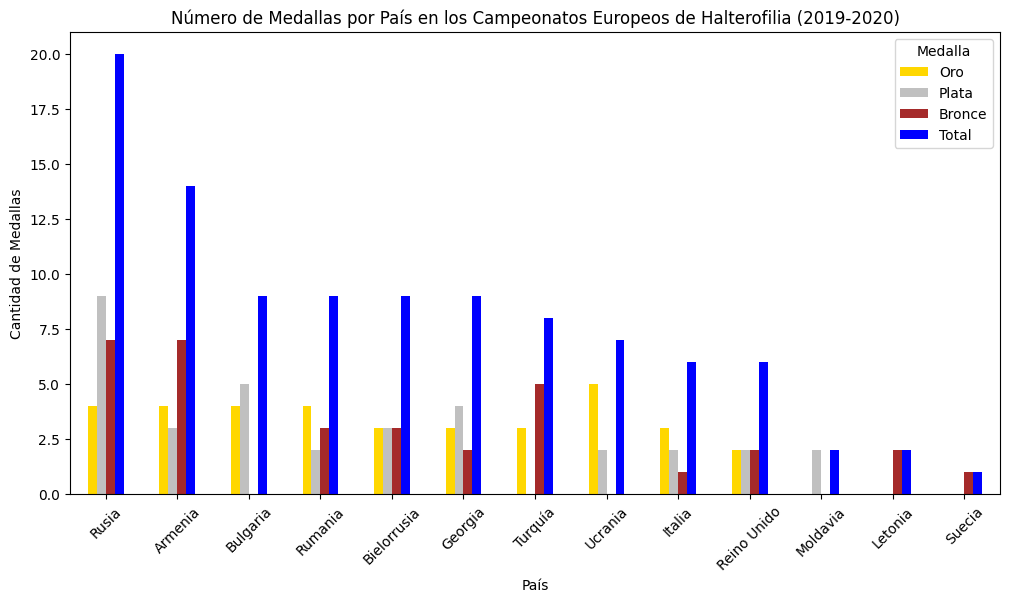

In [52]:
# Conteo de medallas  por país
oro_por_pais = df_final[df_final['Medalla'] == 'Oro']['Pais'].value_counts().head(10)

plata_por_pais =df_final[df_final['Medalla'] == 'Plata']['Pais'].value_counts().head(10)

bronce_por_pais = df_final[df_final['Medalla'] == 'Bronce']['Pais'].value_counts().head(10)

# Crear un DataFrame combinando los tres conteos
medallas_por_pais = pd.concat([oro_por_pais, plata_por_pais, bronce_por_pais], axis=1)

# Renombrar las columnas
medallas_por_pais.columns = ['Oro', 'Plata', 'Bronce']

# Llenar valores NaN con 0 (para países que no aparecen en alguna categoría)
medallas_por_pais = medallas_por_pais.fillna(0)

# Ordenar por el total de medallas
medallas_por_pais['Total'] = medallas_por_pais.sum(axis=1)
medallas_por_pais = medallas_por_pais.sort_values(by='Total', ascending=False)


#gráfico de barras
medallas_por_pais.plot(kind='bar', figsize=(12, 6), color=['gold', 'silver', 'brown', 'blue'])

#títulos y etiquetas
plt.title('Número de Medallas por País en los Campeonatos Europeos de Halterofilia (2019-2020)')
plt.xlabel('País')
plt.ylabel('Cantidad de Medallas')
plt.legend(title='Medalla')

# Rotar etiquetas del eje X para mejor visibilidad
plt.xticks(rotation=45)


plt.show()

### **Pregunta 2.** ¿Qué país ha logrado la mayor equidad en términos de éxito entre sus atletas femeninos y masculinos?

In [53]:
medallas_genero = df_final.groupby(["Pais", "Género"]).size().unstack(fill_value=0)
medallas_genero["Diferencia_abs"] = (medallas_genero["Femenino"] - medallas_genero["Masculino"]).abs()
pais_mas_equilibrado = medallas_genero.sort_values(by="Diferencia_abs")
pais_mas_equilibrado.head(5)

Género      Femenino  Masculino  Diferencia_abs
Pais                                           
Alemania           1          1               0
Azerbaiyán         1          1               0
Moldavia           1          1               0
Austria            1          0               1
Francia            2          1               1

In [54]:
print(r'Los paises con mayor equidad en términos de éxito entre sus atletas femeninos y masculinos son Alemania, Azerbaiyan y Moldavia ')

Los paises con mayor equidad en términos de éxito entre sus atletas femeninos y masculinos son Alemania, Azerbaiyan y Moldavia 


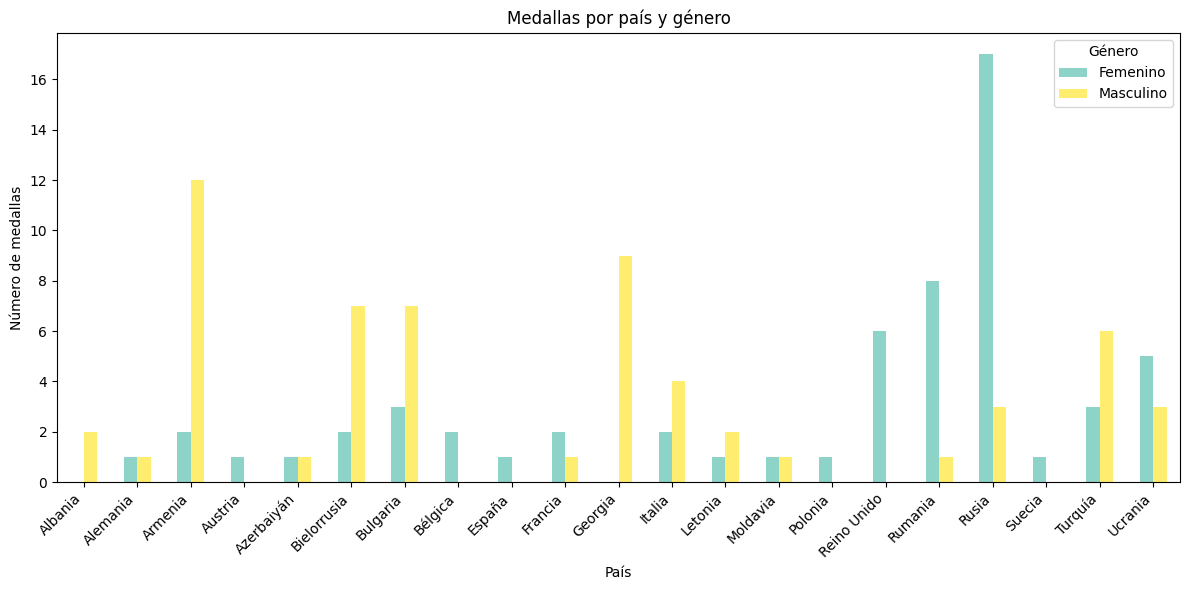

In [55]:
medallas_genero = df_final.groupby(["Pais", "Género"]).size().unstack(fill_value=0)

medallas_genero.plot(kind='bar', figsize=(12,6), colormap='Set3')
plt.title("Medallas por país y género")
plt.ylabel("Número de medallas")
plt.xlabel("País")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Género")
plt.tight_layout()
plt.show()

### **Pregunta 3.** ¿En qué país es menor la diferencia entre el promedio de puntos totales conseguidos por atletas femeninos y masculinos?

In [56]:
promedios = df_final.groupby(["Pais", "Género"])["Total"].mean().unstack()
promedios["Diferencia_abs"] = (promedios["Femenino"] - promedios["Masculino"]).abs()
paises_puntos_totales = promedios[promedios["Diferencia_abs"] == promedios["Diferencia_abs"].min()]
paises_puntos_totales


Género   Femenino  Masculino  Diferencia_abs
Pais                                        
Rumania     213.0      248.0            35.0

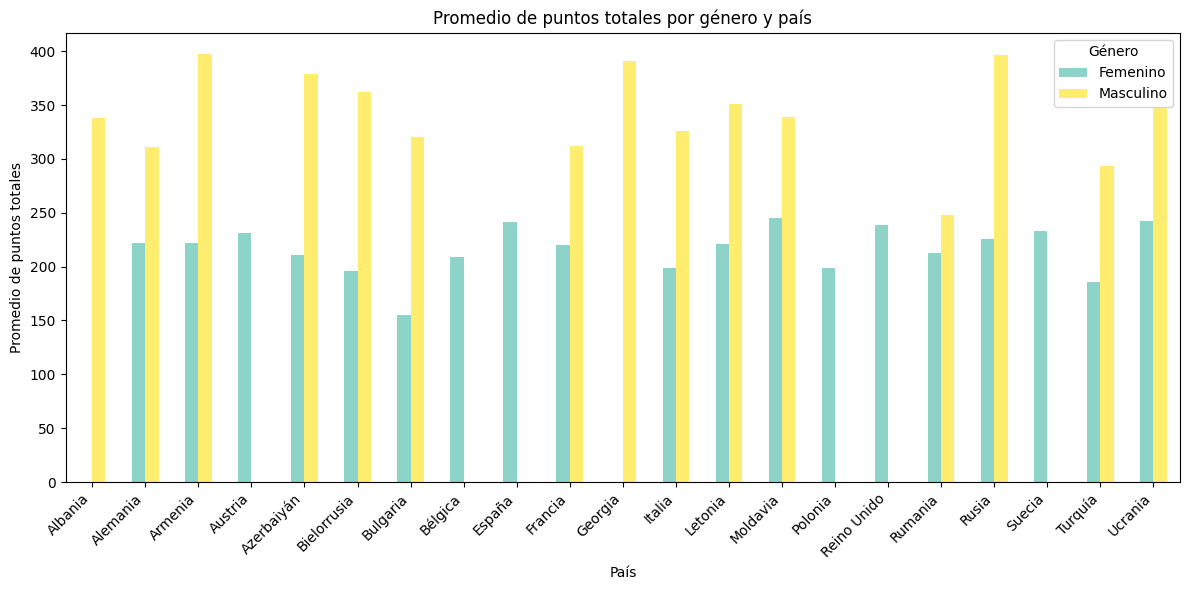

In [57]:
promedios[["Femenino", "Masculino"]].plot(kind='bar', figsize=(12, 6), colormap='Set3')
plt.title("Promedio de puntos totales por género y país")
plt.ylabel("Promedio de puntos totales")
plt.xlabel("País")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

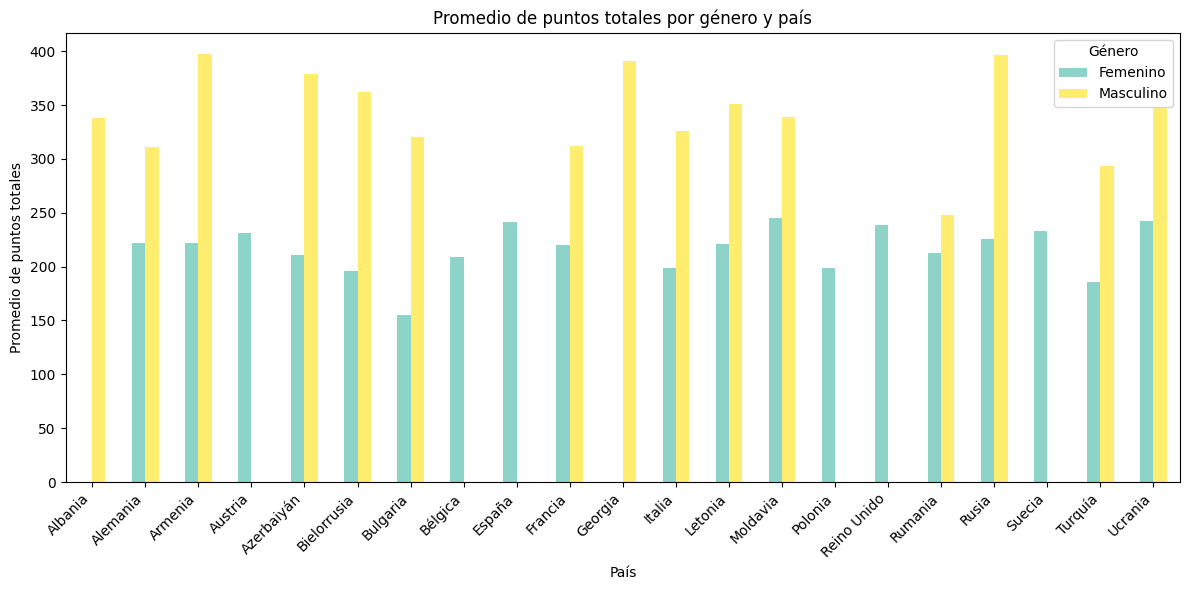

In [58]:
promedios[["Femenino", "Masculino"]].plot(kind='bar', figsize=(12, 6), colormap='Set3')
plt.title("Promedio de puntos totales por género y país")
plt.ylabel("Promedio de puntos totales")
plt.xlabel("País")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **Fase 2.** Añadiendo los datos obtenidos mediante Web scraping

## 0. Importación de librerías

- **Paso 0: Importa las librerías necesarias y define funciones**

In [67]:
!pip install html5lib
!pip install lxml
#Librerias Web Scraping
from bs4 import BeautifulSoup
import requests
import html5lib


## 1. Carga de datos (web scraping)

- **Paso 1: Carga los datos**

In [68]:
urls = {
    2021: "https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2021",
    2022: "https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2022",
    2023: "https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2023",
    2024: "https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2024"
}

## 2. Exploración inicial

- **Paso 2: Realiza una exploración inicial de los datos a analizar**

In [71]:
dataframes = []
for anio, url in urls.items():
    res = requests.get(url)
    soup = BeautifulSoup(res.content, 'html.parser')
    tablas = soup.find_all('table', class_='wikitable')
    tablas_validas = []
    for tabla in tablas:
        try:
            df = pd.read_html(str(tabla), flavor='bs4')[0]
            if any('evento' in str(col).lower() for col in df.columns) and df.shape[1] >= 4 and df.shape[0] > 5:
                tablas_validas.append(df)
        except:
            continue
    # Alternar género: masculino, femenino, masculino, femenino...
    generos = ['Masculino', 'Femenino'] * ((len(tablas_validas) // 2) + 1)
    for i, df in enumerate(tablas_validas):
        df['Año'] = anio
        df['Género'] = generos[i]
        dataframes.append(df)
# Concatenar todo
df_segunda_parte = pd.concat(dataframes, ignore_index=True)
# Limpieza de columnas
df_segunda_parte.columns = df_segunda_parte.columns.str.strip().str.replace('\n', ' ').str.replace(r'\s+', ' ', regex=True)
display(df_segunda_parte)

C:\Users\paran\AppData\Local\Temp\ipykernel_9656\2176441979.py:9: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(tabla), flavor='bs4')[0]
C:\Users\paran\AppData\Local\Temp\ipykernel_9656\2176441979.py:9: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(tabla), flavor='bs4')[0]
C:\Users\paran\AppData\Local\Temp\ipykernel_9656\2176441979.py:9: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(tabla), flavor='bs4')[0]
C:\Users\paran\AppData\Local\Temp\ipykernel_9656\2176441979.py:9: FutureWarning: Passing literal html to 'read_html' is deprecated and will be remov

Evento                                         Unnamed: 1  \
0    55 kg (04.04)       Anguel Rusev Bulgaria  111 + 147 = 258[n 1]​   
1    61 kg (04.04)          Stilian Grozdev Bulgaria  136 + 160 = 296   
2    67 kg (05.04)            Muhammed Özbek Turquía  145 + 178 = 323   
3    73 kg (06.04)         Daniyar İsmayilov Turquía  160 + 181 = 341   
4    81 kg (07.04)         Antonino Pizzolato Italia  164 + 206 = 370   
..             ...                                                ...   
75   71 kg (16.02)             Loredana Toma Rumania  114 + 127 = 241   
76   76 kg (17.02)           Genna Toko Kegne Italia  101 + 120 = 221   
77   81 kg (18.02)  Weronika Zielińska-Stubińska Polonia  103 + 13...   
78   87 kg (19.02)            Solfrid Koanda Noruega  120 + 160 = 280   
79  +87 kg (20.02)        Emily Campbell Reino Unido  112 + 151 = 263   

                                       Unnamed: 2  \
0   Valentin Iancu Rumania  108 + 140 = 248[n 1]​   
1      Shota Mishvelidze Georgia  135 + 155 = 290   
2             Mirko Zanni Italia  148 + 170 = 318   
3            Marin Robu Moldavia  156 + 183 = 339   
4          Karlos Nasar Bulgaria  163 + 206 = 369   
..                                            ...   
75   Siuzanna Valodzka AIN[a 1]​  105 + 130 = 235   
76        Nikol Rubanovich Israel  99 + 117 = 216   
77        Elena Erighina Moldavia  103+ 131 = 234   
78  Anastasiya Manievska Ucrania  102 + 128 = 230   
79    Anastasiya Hotfrid Georgia  117 + 140 = 257   

                                          Unnamed: 3   Año     Género  
0   Dmytro Voronovsky Ucrania  110 + 137 = 247[n 1]​  2021  Masculino  
1              Ferdi Hardal Turquía  130 + 157 = 287  2021  Masculino  
2        Valentin Guenchev Bulgaria  138 + 177 = 315  2021  Masculino  
3              Briken Calja Albania  152 + 184 = 336  2021  Masculino  
4          Ritvars Suharevs Letonia  157 + 190 = 347  2021  Masculino  
..                                               ...   ...        ...  
75    Lisa Marie Schweizer Alemania  107 + 124 = 231  2024   Femenino  
76              Lara Dancz Alemania  101 + 114 = 215  2024   Femenino  
77              Dilara Narin Turquía  97 + 125 = 222  2024   Femenino  
78      Hripsime Jurshudian Armenia  105 + 122 = 227  2024   Femenino  
79           Fatmagül Çevik Turquía  107 + 131 = 238  2024   Femenino  

[80 rows x 6 columns]

##  Union de data frame 2021-2024

## 3. Limpieza de datos y Transformación de los datos 

- **Paso 3: Comprueba que los datos no contengan valores problemáticos**

In [72]:
# Reorganizar columnas de medallas a formato largo
df_limpio_2 = df_segunda_parte.melt(
    id_vars=["Evento", "Año", "Género"],
    value_vars=["Unnamed: 1", "Unnamed: 2", "Unnamed: 3"],
    var_name="ColumnaOriginal",
    value_name="Texto"
)

# Eliminar anotaciones como [n 1] y caracteres invisibles
df_limpio_2["Texto"] = (
    df_limpio_2["Texto"]
    .astype(str)
    .str.replace(r"\[.*?\]", "", regex=True)
    .str.replace("\u200b", " ")
    .str.replace("\xa0", " ")
    .str.strip()
    .replace(r'\s+', ' ', regex=True)
)

# Extraer puntuaciones: "120 + 150 = 270"
pattern = r'(\d+)\s*\+\s*(\d+)\s*=\s*(\d+)'
resultados = df_limpio_2["Texto"].str.extract(pattern)
df_limpio_2["Arrancada"] = resultados[0].astype(float)
df_limpio_2["Dos_Tiempos"] = resultados[1].astype(float)
df_limpio_2["Total"] = resultados[2].astype(float)

# Eliminar la parte de puntuación para extraer nombre y país
df_limpio_2["Texto_Limpio"] = df_limpio_2["Texto"].str.replace(pattern, "", regex=True).str.strip()

# Extraer nombre, apellido, país
def extraer_nombre_apellido_pais(texto):
    texto = str(texto).strip()
    texto = re.sub(r'\s+', ' ', texto.replace('\u200b', ' ').replace('\xa0', ' '))
    partes = texto.split()
    if len(partes) < 3:
        return "", "", ""
    nombre = partes[0]
    if partes[-2:] == ["Reino", "Unido"]:
        pais = "Reino Unido"
        apellido = " ".join(partes[1:-2])
    else:
        pais = partes[-1]
        apellido = " ".join(partes[1:-1])
    return pd.Series([nombre, apellido, pais])

df_limpio_2[["Nombre", "Apellido", "Pais"]] = df_limpio_2["Texto_Limpio"].apply(extraer_nombre_apellido_pais)

# Añadir columna 'Medalla' según el orden en cada evento
df_limpio_2["OrdenEnEvento"] = df_limpio_2.groupby(["Evento", "Año", "Género"]).cumcount()
df_limpio_2["Medalla"] = df_limpio_2["OrdenEnEvento"].map({0: "Oro", 1: "Plata", 2: "Bronce"})

# Crear DataFrame final con Medalla incluida
df_limpio_segunda_parte = df_limpio_2[[
    "Género", "Evento", "Año", "Medalla", "Nombre", "Apellido", "Pais", "Arrancada", "Dos_Tiempos", "Total"
]]

# Limpieza adicional de espacios
df_limpio_segunda_parte["Evento"] = df_limpio_segunda_parte["Evento"].str.strip()

# Eliminar la parte de la fecha entre paréntesis en la columna "Evento"
df_limpio_segunda_parte["Evento"] = df_limpio_segunda_parte["Evento"].str.replace(r"\s*\(.*?\)", "", regex=True).str.strip()

C:\Users\paran\AppData\Local\Temp\ipykernel_9656\3309502110.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio_segunda_parte["Evento"] = df_limpio_segunda_parte["Evento"].str.strip()
C:\Users\paran\AppData\Local\Temp\ipykernel_9656\3309502110.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio_segunda_parte["Evento"] = df_limpio_segunda_parte["Evento"].str.replace(r"\s*\(.*?\)", "", regex=True).str.strip()


In [73]:
df_limpio_segunda_parte.head()

Género Evento   Año Medalla    Nombre   Apellido      Pais  Arrancada  \
0  Masculino  55 kg  2021     Oro    Anguel      Rusev  Bulgaria      111.0   
1  Masculino  61 kg  2021     Oro   Stilian    Grozdev  Bulgaria      136.0   
2  Masculino  67 kg  2021     Oro  Muhammed      Özbek   Turquía      145.0   
3  Masculino  73 kg  2021     Oro   Daniyar  İsmayilov   Turquía      160.0   
4  Masculino  81 kg  2021     Oro  Antonino  Pizzolato    Italia      164.0   

   Dos_Tiempos  Total  
0        147.0  258.0  
1        160.0  296.0  
2        178.0  323.0  
3        181.0  341.0  
4        206.0  370.0

- **Paso 5: Transforma el DataFrame para tener las siguientes columnas: Eventos, Año, Genero, Medalla (que indica si es Oro, Plata o Bronce) y Atleta (que contiene la información del atleta correspondiente)**

    Formato inicial:

    | Eventos | Oro | Plata | Bronce | Año | Género |
    |---------|-----|-------|--------|-----|--------|

    **¡Importante!**
    El dataframe final debe tener este formato:

    | Eventos | Año | Genero | Medalla | Atleta |
    |---------|-----|-------|--------|-----|

In [74]:
# Crear columna "Atleta" combinando nombre y apellido
df_transformado_2 = df_limpio_segunda_parte.copy()
df_transformado_2["Atleta"] = df_transformado_2["Nombre"] + " " + df_transformado_2["Apellido"]

# Seleccionar y reordenar las columnas finales
df_final_estructura_2 = df_transformado_2[["Evento", "Año", "Género", "Medalla", "Atleta"]].copy()

df_final_estructura_2

Evento   Año     Género Medalla                Atleta
0     55 kg  2021  Masculino     Oro          Anguel Rusev
1     61 kg  2021  Masculino     Oro       Stilian Grozdev
2     67 kg  2021  Masculino     Oro        Muhammed Özbek
3     73 kg  2021  Masculino     Oro     Daniyar İsmayilov
4     81 kg  2021  Masculino     Oro    Antonino Pizzolato
..      ...   ...        ...     ...                   ...
235   71 kg  2024   Femenino  Bronce  Lisa Marie Schweizer
236   76 kg  2024   Femenino  Bronce            Lara Dancz
237   81 kg  2024   Femenino  Bronce          Dilara Narin
238   87 kg  2024   Femenino  Bronce   Hripsime Jurshudian
239  +87 kg  2024   Femenino  Bronce        Fatmagül Çevik

[240 rows x 5 columns]

- **Paso 6: Crea las siguientes columnas:**
    - Fecha
    - Nombre
    - Apellido
    - País
    - Resultados
    - Arrancada
    - Dos tiempos
    - Total

In [75]:
# Copiar el DataFrame original
df_extendido_ajustado = df_limpio_segunda_parte.copy()

# 1. Asignar el año directamente como 'Fecha'
df_extendido_ajustado["Fecha"] = df_extendido_ajustado["Año"]

# 2. Crear la columna 'Resultados' usando solo la puntuación total
df_extendido_ajustado["Resultados"] = df_extendido_ajustado["Total"].astype(int)

# 3. Reorganizar las columnas en el orden solicitado
df_final_extendido_ajustado = df_extendido_ajustado[[
    "Fecha", "Nombre", "Apellido", "Pais", "Resultados",
    "Arrancada", "Dos_Tiempos", "Total"
]].copy()

df_final_extendido_ajustado

Fecha    Nombre         Apellido      Pais  Resultados  Arrancada  \
0     2021    Anguel            Rusev  Bulgaria         258      111.0   
1     2021   Stilian          Grozdev  Bulgaria         296      136.0   
2     2021  Muhammed            Özbek   Turquía         323      145.0   
3     2021   Daniyar        İsmayilov   Turquía         341      160.0   
4     2021  Antonino        Pizzolato    Italia         370      164.0   
..     ...       ...              ...       ...         ...        ...   
235   2024      Lisa  Marie Schweizer  Alemania         231      107.0   
236   2024      Lara            Dancz  Alemania         215      101.0   
237   2024    Dilara            Narin   Turquía         222       97.0   
238   2024  Hripsime       Jurshudian   Armenia         227      105.0   
239   2024  Fatmagül            Çevik   Turquía         238      107.0   

     Dos_Tiempos  Total  
0          147.0  258.0  
1          160.0  296.0  
2          178.0  323.0  
3          181.0  341.0  
4          206.0  370.0  
..           ...    ...  
235        124.0  231.0  
236        114.0  215.0  
237        125.0  222.0  
238        122.0  227.0  
239        131.0  238.0  

[240 rows x 8 columns]

- **Paso 7: Filtrado de columnas y ordenación**

    **¡Importante!**
    El dataframe final debe contener exclusivamente las siguientes columnas:

    | Género    | Categoría | Fecha | Medalla | Nombre | Apellido | País | Arrancada | Dos tiempos | Total |
    |-----------|-----------|-------|---------|--------|----------|------|-----------|-------------|-------|

In [77]:
# Crear el DataFrame final con las columnas seleccionadas y en el orden adecuado
df_entregable_final = df_limpio_segunda_parte[[
    "Género",
    "Evento",           # Esto contiene la categoría (ej: "55 kg")
    "Año",              # Esto lo renombraremos a "Fecha"
    "Medalla",
    "Nombre",
    "Apellido",
    "Pais",
    "Arrancada",
    "Dos_Tiempos",
    "Total"
]].copy()

# Renombrar columnas para cumplir con los nombres solicitados
df_entregable_final.rename(columns={
    "Evento": "Categoría",
    "Año": "Fecha"
}, inplace=True)

# Mostrar las primeras filas como verificación
df_entregable_final.head()


Género Categoría  Fecha Medalla    Nombre   Apellido      Pais  \
0  Masculino     55 kg   2021     Oro    Anguel      Rusev  Bulgaria   
1  Masculino     61 kg   2021     Oro   Stilian    Grozdev  Bulgaria   
2  Masculino     67 kg   2021     Oro  Muhammed      Özbek   Turquía   
3  Masculino     73 kg   2021     Oro   Daniyar  İsmayilov   Turquía   
4  Masculino     81 kg   2021     Oro  Antonino  Pizzolato    Italia   

   Arrancada  Dos_Tiempos  Total  
0      111.0        147.0  258.0  
1      136.0        160.0  296.0  
2      145.0        178.0  323.0  
3      160.0        181.0  341.0  
4      164.0        206.0  370.0

- **Paso 8: Trasformación del tipo de datos. Los tipos de las columnas deben ser los siguientes:**

    - **Género**: `object`
    - **Categoría**: `object`/`int64`
    - **Fecha**: `datetime64[ns]`
    - **Medalla**: `category`
    - **Nombre**: `object`
    - **Apellido**: `object`
    - **País**: `object`
    - **Arrancada**: `int64`
    - **Dos tiempos**: `int64`
    - **Total**: `int64`

In [78]:
# Convertir tipos de datos según lo especificado
df_entregable_final["Género"] = df_entregable_final["Género"].astype("object")
df_entregable_final["Categoría"] = df_entregable_final["Categoría"].astype("object")  # o int si es necesario
df_entregable_final["Fecha"] = pd.to_datetime(df_entregable_final["Fecha"], format='%Y', errors='coerce')
df_entregable_final["Medalla"] = df_entregable_final["Medalla"].astype("category")
df_entregable_final["Nombre"] = df_entregable_final["Nombre"].astype("object")
df_entregable_final["Apellido"] = df_entregable_final["Apellido"].astype("object")
df_entregable_final["Pais"] = df_entregable_final["Pais"].astype("object")

# Convertir puntuaciones asegurando que no haya NaNs antes de convertir a int
df_entregable_final["Arrancada"] = df_entregable_final["Arrancada"].fillna(0).astype("int64")
df_entregable_final["Dos_tiempos"] = df_entregable_final["Dos_Tiempos"].fillna(0).astype("int64")
df_entregable_final["Total"] = df_entregable_final["Total"].fillna(0).astype("int64")

# Verificación final de tipos
df_entregable_final.dtypes

Género                 object
Categoría              object
Fecha          datetime64[ns]
Medalla              category
Nombre                 object
Apellido               object
Pais                   object
Arrancada               int64
Dos_Tiempos           float64
Total                   int64
Dos_tiempos             int64
dtype: object

- **Paso 9: Ordena el conjunto de datos por las siguientes columnas:
['Genero', 'Categoria', 'Medalla']**

In [79]:
# Ordenar por Género, Categoría y Medalla
df_entregable_final = df_entregable_final.sort_values(by=["Género", "Categoría", "Medalla"]).reset_index(drop=True)
# Quitar el signo '+' de la columna 'Categoria'
df_entregable_final["Categoría"] = df_entregable_final["Categoría"].str.replace("+", "", regex=False)

display(df_entregable_final)

Género Categoría      Fecha Medalla     Nombre      Apellido  \
0     Femenino     87 kg 2021-01-01  Bronce     Melike         Günal   
1     Femenino     87 kg 2022-01-01  Bronce      Sarah       Fischer   
2     Femenino     87 kg 2023-01-01  Bronce  Valentyna         Kisil   
3     Femenino     87 kg 2024-01-01  Bronce   Fatmagül         Çevik   
4     Femenino     87 kg 2021-01-01     Oro      Emily      Campbell   
..         ...       ...        ...     ...        ...           ...   
235  Masculino     96 kg 2024-01-01     Oro      Hakob     Mkrtchian   
236  Masculino     96 kg 2021-01-01   Plata      Piotr      Asayonak   
237  Masculino     96 kg 2022-01-01   Plata        Ara      Aghanian   
238  Masculino     96 kg 2023-01-01   Plata        Ara      Aghanian   
239  Masculino     96 kg 2024-01-01   Plata      Davit  Hovhannisian   

            Pais  Arrancada  Dos_Tiempos  Total  Dos_tiempos  
0        Turquía        108        135.0    243          135  
1        Austria        102        128.0    230          128  
2        Ucrania        111        133.0    244          133  
3        Turquía        107        131.0    238          131  
4    Reino Unido        122        154.0    276          154  
..           ...        ...          ...    ...          ...  
235      Armenia        166        209.0    375          209  
236  Bielorrusia        172        202.0    374          202  
237      Armenia        170        205.0    375          205  
238      Armenia        165        199.0    364          199  
239      Armenia        169        205.0    374          205  

[240 rows x 11 columns]

## 5. EDA

- **Paso 10: Realiza un análisis exploratorio de los datos (EDA) que te permita ganar conocimiento sobre el conjunto de datos antes de resolver a las preguntas**


C:\Users\paran\AppData\Local\Temp\ipykernel_9656\325856698.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_entregable_final, y='Pais', order=df_entregable_final['Pais'].value_counts().head(10).index, palette='Reds_r')
C:\Users\paran\AppData\Local\Temp\ipykernel_9656\325856698.py:10: UserWarning: Glyph 127941 (\N{SPORTS MEDAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\paran\anaconda3\envs\Test\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127941 (\N{SPORTS MEDAL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


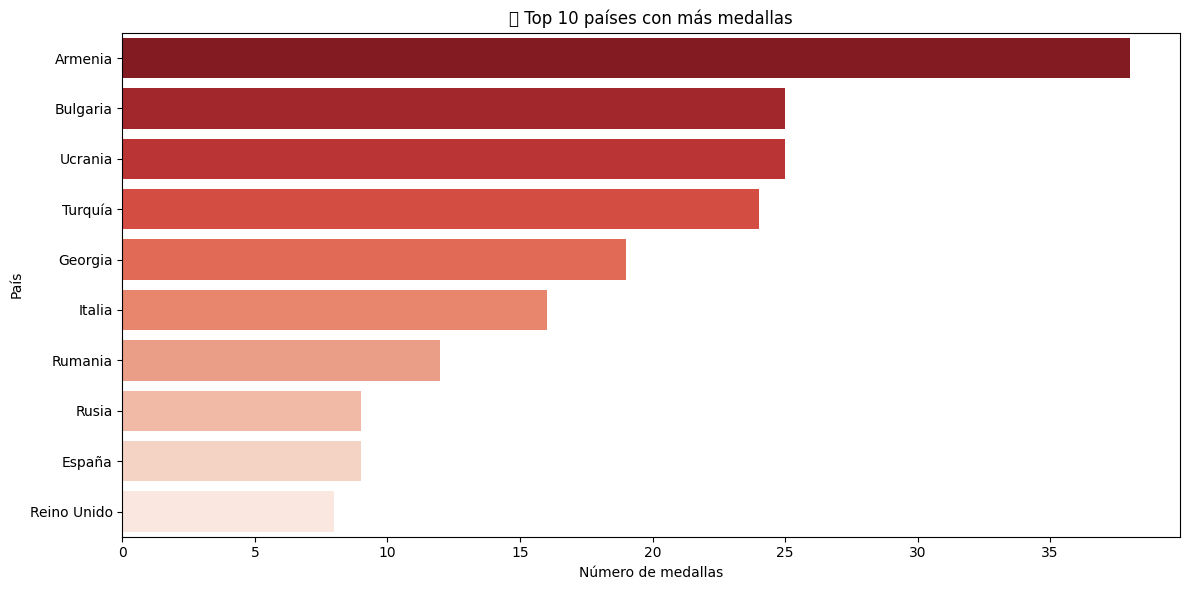

C:\Users\paran\AppData\Local\Temp\ipykernel_9656\325856698.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_entregable_final, x='Género', palette='Reds')


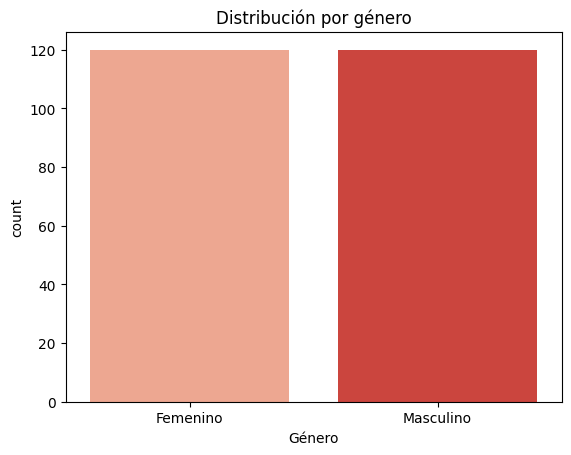

C:\Users\paran\AppData\Local\Temp\ipykernel_9656\325856698.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_entregable_final, y='Categoría', order=df_entregable_final['Categoría'].value_counts().head(10).index, palette='Reds_r')


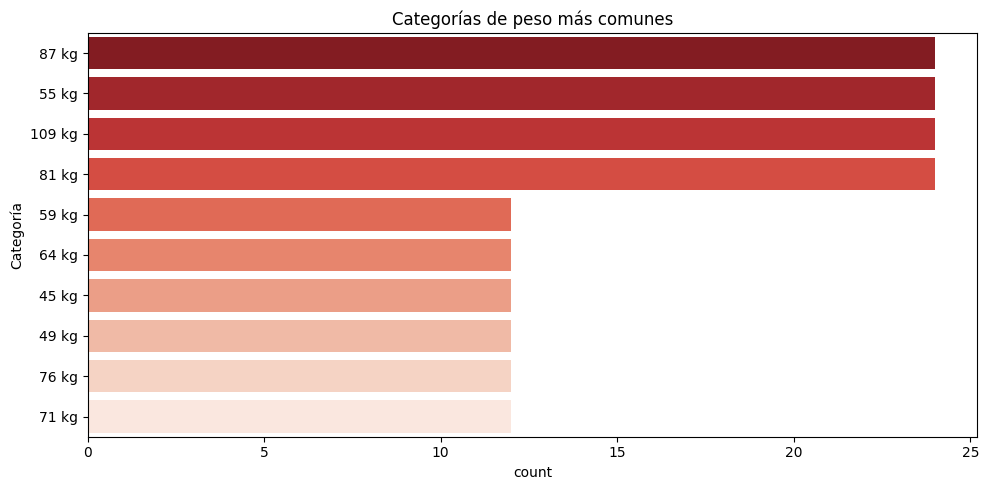

C:\Users\paran\AppData\Local\Temp\ipykernel_9656\325856698.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_entregable_final, x='Fecha', palette='Reds')


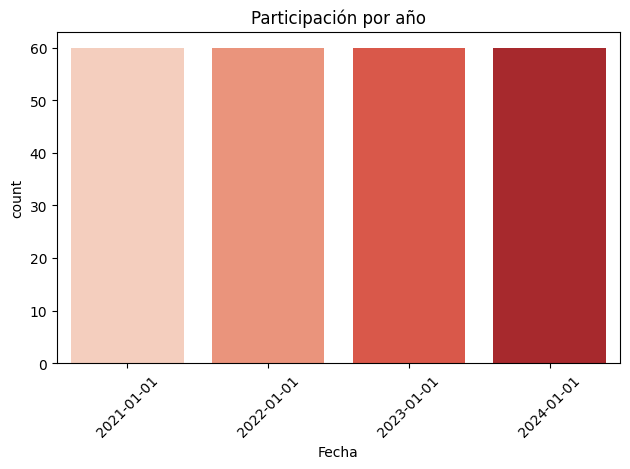

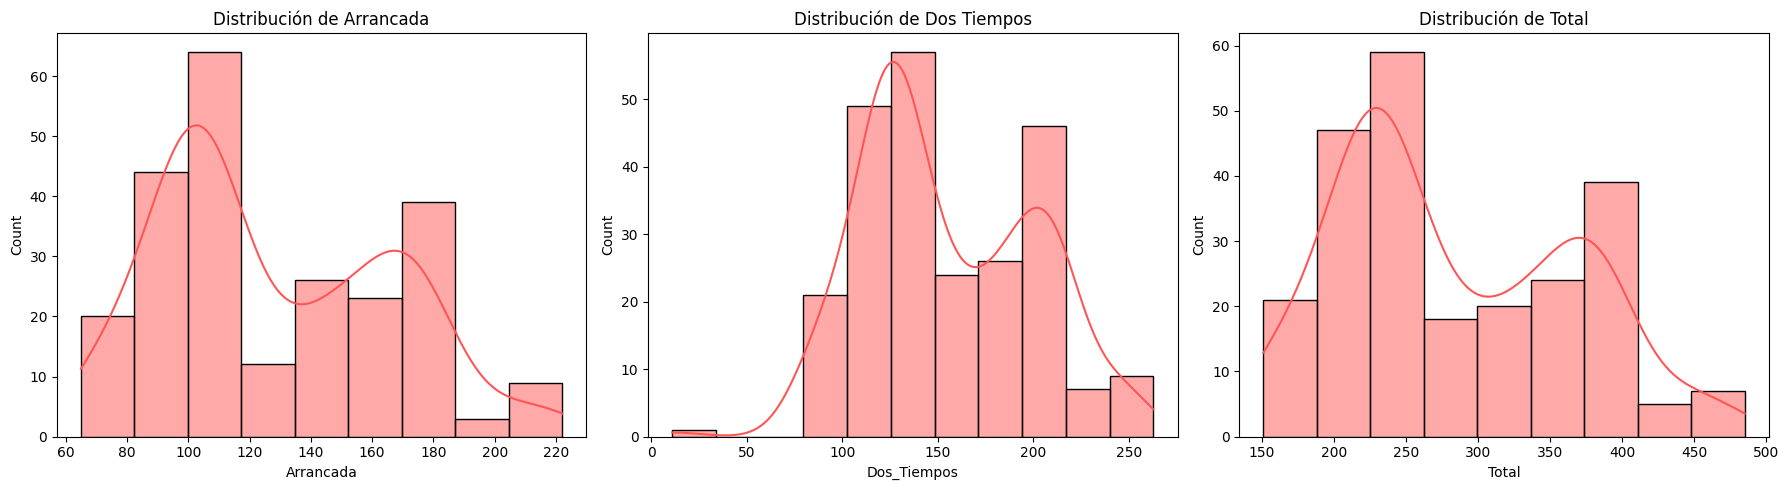

C:\Users\paran\AppData\Local\Temp\ipykernel_9656\325856698.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_atletas.values, y=top_atletas.index, palette='Reds_r')


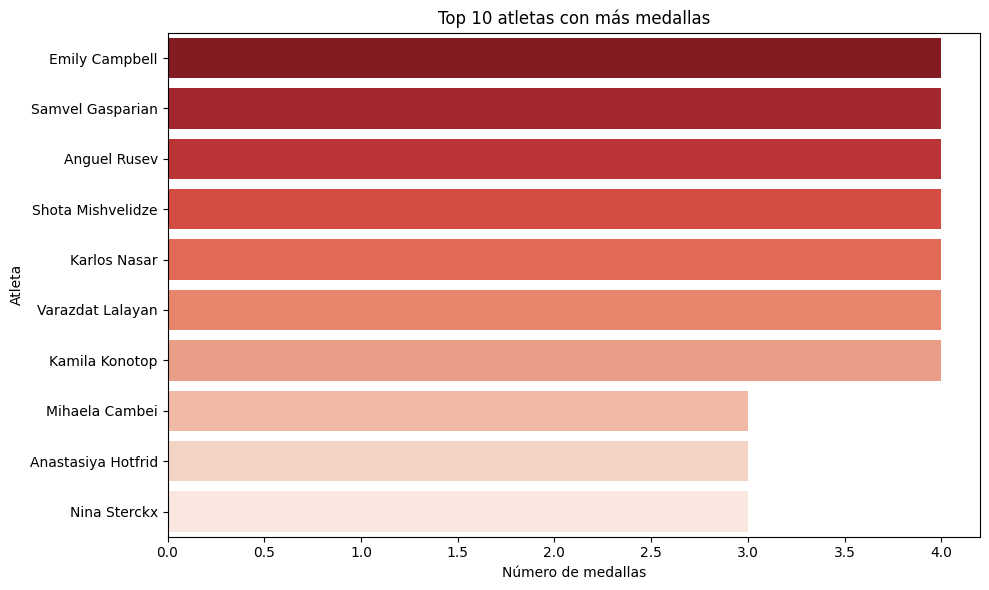

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Medallas por país
plt.figure(figsize=(12, 6))
sns.countplot(data=df_entregable_final, y='Pais', order=df_entregable_final['Pais'].value_counts().head(10).index, palette='Reds_r')
plt.title('🏅 Top 10 países con más medallas')
plt.xlabel('Número de medallas')
plt.ylabel('País')
plt.tight_layout()
plt.show()

# 3. Distribución de género (corregido el nombre de la columna)
sns.countplot(data=df_entregable_final, x='Género', palette='Reds')
plt.title('Distribución por género')
plt.show()

# 4. Categorías más frecuentes
plt.figure(figsize=(10, 5))
sns.countplot(data=df_entregable_final, y='Categoría', order=df_entregable_final['Categoría'].value_counts().head(10).index, palette='Reds_r')
plt.title('Categorías de peso más comunes')
plt.tight_layout()
plt.show()

# 5. Evolución por año
sns.countplot(data=df_entregable_final, x='Fecha', palette='Reds')
plt.title('Participación por año')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 6. Distribución de resultados
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df_entregable_final['Arrancada'], kde=True, ax=axes[0], color='#ff5555')
axes[0].set_title('Distribución de Arrancada')
sns.histplot(df_entregable_final['Dos_Tiempos'], kde=True, ax=axes[1], color='#ff5555')
axes[1].set_title('Distribución de Dos Tiempos')
sns.histplot(df_entregable_final['Total'], kde=True, ax=axes[2], color='#ff5555')
axes[2].set_title('Distribución de Total')
plt.tight_layout()
plt.show()

# 7. Top atletas con más medallas
df_entregable_final['Atleta'] = df_entregable_final['Nombre'] + ' ' + df_entregable_final['Apellido']
top_atletas = df_entregable_final['Atleta'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_atletas.values, y=top_atletas.index, palette='Reds_r')
plt.title('Top 10 atletas con más medallas')
plt.xlabel('Número de medallas')
plt.ylabel('Atleta')
plt.tight_layout()
plt.show()


## 6. Resolución

### **Pregunta 1.** ¿Cuántas medallas de cada tipo (oro, plata y bronce) ha ganado cada país en la competición? (Sin considerar el género)

C:\Users\paran\AppData\Local\Temp\ipykernel_9656\2950759194.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medallas_por_pais = df_entregable_final.groupby(['Pais', 'Medalla']).size().reset_index(name='Cantidad')


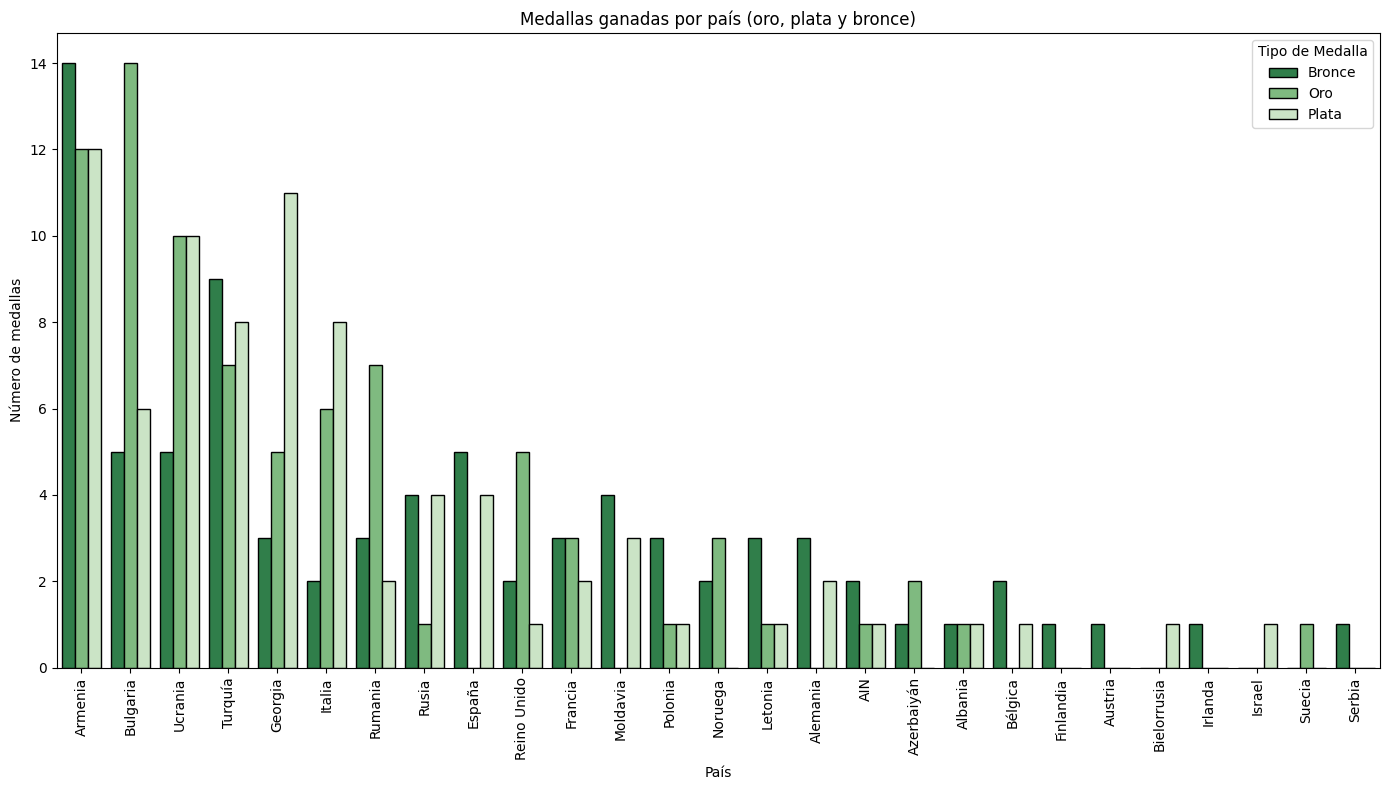

In [88]:
# Agrupamos por país y medalla
medallas_por_pais = df_entregable_final.groupby(['Pais', 'Medalla']).size().reset_index(name='Cantidad')

# Ordenar países por total de medallas
orden_paises = medallas_por_pais.groupby('Pais')['Cantidad'].sum().sort_values(ascending=False).index

# Crear gráfico
plt.figure(figsize=(14, 8))
sns.barplot(
    data=medallas_por_pais,
    x='Pais',
    y='Cantidad',
    hue='Medalla',
    order=orden_paises,
    palette='Greens_r',
    edgecolor='black'
)
plt.title("Medallas ganadas por país (oro, plata y bronce)")
plt.xlabel("País")
plt.ylabel("Número de medallas")
plt.xticks(rotation=90)
plt.legend(title="Tipo de Medalla")
plt.tight_layout()
plt.show()

In [91]:
# 📌 Agrupar por país y medalla, contando las ocurrencias
medallas_por_pais = df_entregable_final.groupby(['Pais', 'Medalla']).size().reset_index(name='Cantidad')

# 📌 Reformatear los datos en formato tabla con columnas para cada tipo de medalla
tabla_medallas = medallas_por_pais.pivot(index='Pais', columns='Medalla', values='Cantidad').fillna(0)

# 📌 Ordenar los países por total de medallas
tabla_medallas['Total'] = tabla_medallas.sum(axis=1)  # Agregamos una columna con el total de medallas
tabla_medallas = tabla_medallas.sort_values(by='Total', ascending=False)  # Ordenamos de mayor a menor

# 📌 Mostrar tabla de medallas
print("\nMedallas ganadas por país:")
print(tabla_medallas)



Medallas ganadas por país:
Medalla      Bronce  Oro  Plata  Total
Pais                                  
Armenia          14   12     12     38
Bulgaria          5   14      6     25
Ucrania           5   10     10     25
Turquía           9    7      8     24
Georgia           3    5     11     19
Italia            2    6      8     16
Rumania           3    7      2     12
Rusia             4    1      4      9
España            5    0      4      9
Reino Unido       2    5      1      8
Francia           3    3      2      8
Moldavia          4    0      3      7
Polonia           3    1      1      5
Noruega           2    3      0      5
Letonia           3    1      1      5
Alemania          3    0      2      5
AIN               2    1      1      4
Azerbaiyán        1    2      0      3
Albania           1    1      1      3
Bélgica           2    0      1      3
Finlandia         1    0      0      1
Austria           1    0      0      1
Bielorrusia       0    0      1     

C:\Users\paran\AppData\Local\Temp\ipykernel_9656\2372722359.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medallas_por_pais = df_entregable_final.groupby(['Pais', 'Medalla']).size().reset_index(name='Cantidad')


### **Pregunta 2.** ¿Qué país ha logrado la mayor equidad en términos de éxito entre sus atletas femeninos y masculinos?

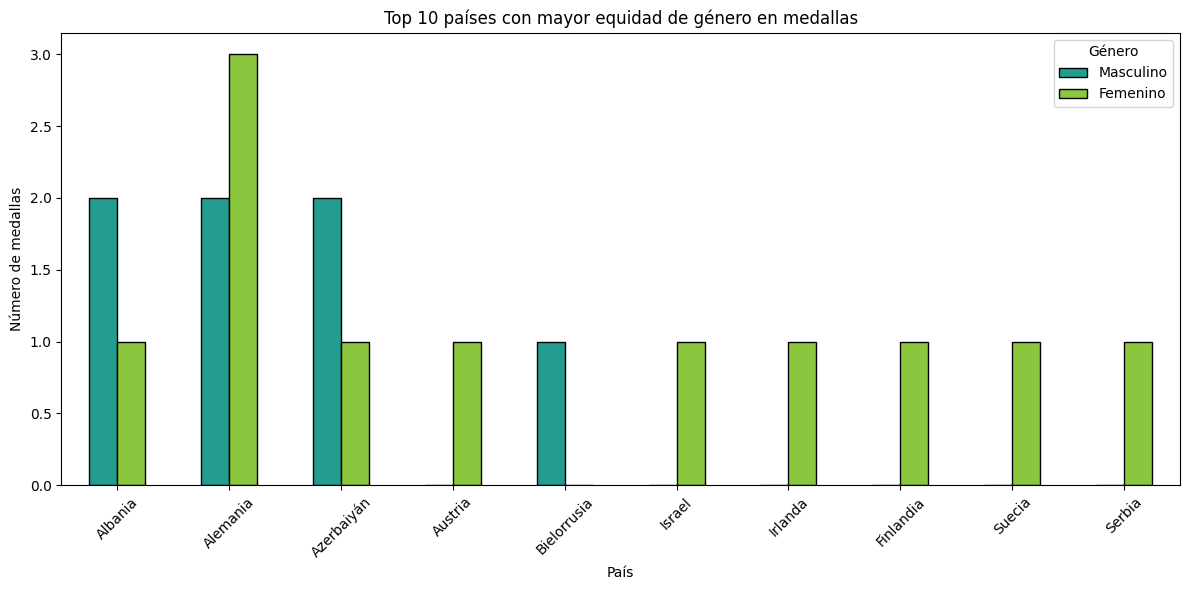

In [90]:
# Contar medallas por país y género
equidad_genero = df_entregable_final.groupby(['Pais', 'Género']).size().unstack(fill_value=0)

# Calcular la diferencia absoluta
equidad_genero['Diferencia'] = abs(equidad_genero['Masculino'] - equidad_genero['Femenino'])

# Ordenar por menor diferencia
equidad_genero_ordenado = equidad_genero.sort_values(by='Diferencia').head(10)

# Visualizar solo los países más equitativos
equidad_genero_ordenado[['Masculino', 'Femenino']].plot(
    kind='bar',
    figsize=(12, 6),
    color=['#259c92', '#8cc63f'],
    edgecolor='black'
)

plt.title("Top 10 países con mayor equidad de género en medallas")
plt.xlabel("País")
plt.ylabel("Número de medallas")
plt.xticks(rotation=45)
plt.legend(title="Género")
plt.tight_layout()
plt.show()


In [92]:
print(equidad_genero_ordenado)


Género       Femenino  Masculino  Diferencia
Pais                                        
Albania             1          2           1
Alemania            3          2           1
Azerbaiyán          1          2           1
Austria             1          0           1
Bielorrusia         0          1           1
Israel              1          0           1
Irlanda             1          0           1
Finlandia           1          0           1
Suecia              1          0           1
Serbia              1          0           1


### **Pregunta 3.** ¿En qué país es menor la diferencia entre el promedio de puntos totales conseguidos por atletas femeninos y masculinos?


🏆 Promedios por país y género:
 Género        Femenino   Masculino  Diferencia
Pais                                          
AIN         235.000000  398.000000  163.000000
Albania     208.000000  338.500000  130.500000
Alemania    223.000000  332.000000  109.000000
Armenia     216.500000  389.781250  173.281250
Azerbaiyán  211.000000  383.500000  172.500000
Bulgaria    153.500000  320.391304  166.891304
España      157.333333  320.833333  163.500000
Francia     225.000000  370.000000  145.000000
Georgia     248.000000  355.750000  107.750000
Italia      204.428571  348.777778  144.349206
Letonia     222.000000  338.000000  116.000000
Moldavia    237.666667  363.750000  126.083333
Polonia     208.750000  324.000000  115.250000
Rumania     206.300000  246.500000   40.200000
Rusia       223.500000  401.000000  177.500000
Turquía     201.266667  320.000000  118.733333
Ucrania     224.318182  298.666667   74.348485

🔍 Países con menor diferencia:
 Género      Femenino   Masculino  Diferen

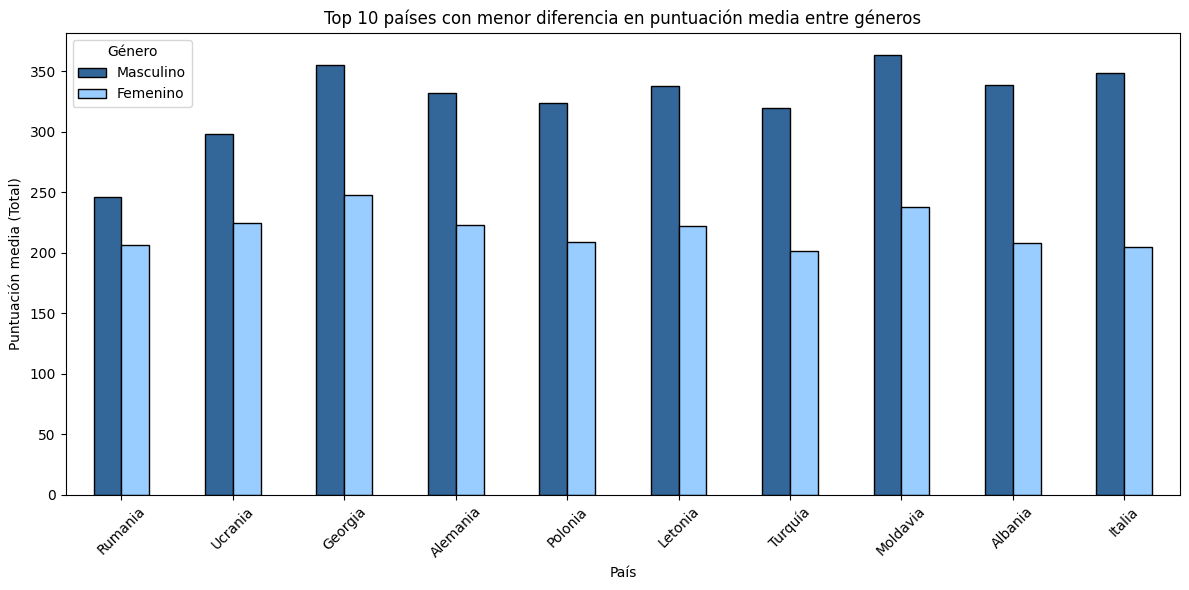

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

# 📌 Paso 1: Calcular promedio del total por país y género
promedios_total = df_entregable_final.groupby(['Pais', 'Género'])['Total'].mean().unstack()

# 📌 Paso 2: Quitar países con valores nulos en alguno de los géneros
promedios_total = promedios_total.dropna()

# 📌 Paso 3: Calcular la diferencia absoluta entre géneros
promedios_total['Diferencia'] = abs(promedios_total['Masculino'] - promedios_total['Femenino'])

# 📌 Paso 4: Ordenar por menor diferencia y seleccionar los más equitativos
promedios_equilibrados = promedios_total.sort_values(by='Diferencia').head(10)

# 📌 Paso 5: Imprimir los datos antes de graficar
print("\n🏆 Promedios por país y género:\n", promedios_total)
print("\n🔍 Países con menor diferencia:\n", promedios_equilibrados)

# 📌 Paso 6: Gráfico comparativo
promedios_equilibrados[['Masculino', 'Femenino']].plot(
    kind='bar',
    figsize=(12, 6),
    color=['#336699', '#99ccff'],
    edgecolor='black'
)

plt.title("Top 10 países con menor diferencia en puntuación media entre géneros")
plt.xlabel("País")
plt.ylabel("Puntuación media (Total)")
plt.xticks(rotation=45)
plt.legend(title="Género")
plt.tight_layout()
plt.show()
